# Supervised Machine Learning Model to Predict Pass or Fail in Critical Areas of Semiconductor Manufacturing Process


In [1]:
import pandas as pd
import numpy as np
import sys
import re
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from matplotlib import style
import seaborn as sns
import math as math
from pylab import rcParams
from scipy import stats
from sklearn.impute import SimpleImputer
from prettytable import PrettyTable
from scipy.stats import zscore 
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics
from sklearn import tree
from sklearn import decomposition, datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold 
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold, train_test_split, cross_val_score

In [2]:
df = pd.read_csv('C:/Users/oyeye/OneDrive - University of Tulsa/Desktop/uci-secom.csv')

In [3]:
df.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [4]:
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

<AxesSubplot:>

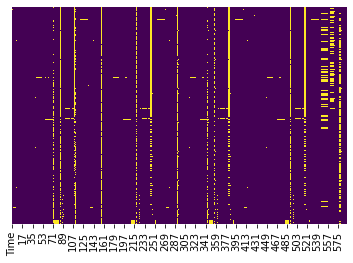

In [5]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

<AxesSubplot:>

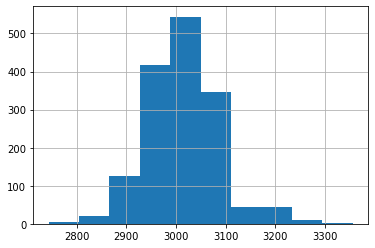

In [6]:
df['0'].hist()

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

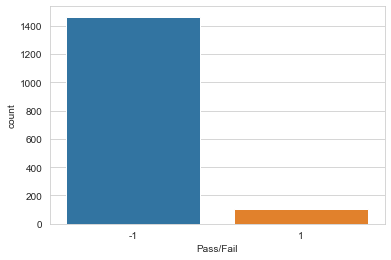

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Pass/Fail', data = df)

In [8]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [9]:
(df[df['Pass/Fail'] == 1].shape[0] / len(df)) * 100

6.636885768985322

In [10]:
(df[df['Pass/Fail'] == -1].shape[0] / len(df)) * 100

93.36311423101468

In [11]:
df['Pass/Fail'].isna().sum()

0

In [12]:
ddf = df.fillna(df.mean())
ddf

Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7         8  ...         581     582     583  \
0     100.0   97.6133  0.1242  1.500500  ...   97.934373  0.5005  0.0118   
1     100.0  102.3433  0.1247  1.496600  ...  208.204500  0.5019  0.0223   
2     100.0   95.4878  0.1241  1.443600  ...   82.860200  0.4958  0.0157   
3     100.0  104.2367  0.1217  1.488200  ...   73.843200  0.4990  0.0103   
4     100.0  100.3967  0.1235  1.503100  ...   97.934373  0.4800  0.4766   
...     ...       ...     ...       ...  ...         ...     ...     ...   
1562  100.0   82.2467  0.1248  1.342400  ...  203.172000  0.4988  0.0143   
1563  100.0   98.4689  0.1205  1.433300  ...   97.934373  0.4975  0.0131   
1564  100.0   99.4122  0.1208  1.462862  ...   43.523100  0.4987  0.0153   
1565  100.0   98.7978  0.1213  1.462200  ...   93.494100  0.5004  0.0178   
1566  100.0   85.1011  0.1235  1.462862  ...  137.784400  0.4987  0.0181   

         584      585       586       587       588         589  Pass/Fail  
0     0.0035   2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1     0.0055   4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2     0.0039   3.1745  0.058400  0.048400  0.014800   82.860200          1  
3     0.0025   2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4     0.1045  99.3032  0.020200  0.014900  0.004400   73.843200         -1  
...      ...      ...       ...       ...       ...         ...        ...  
1562  0.0039   2.8669  0.006800  0.013800  0.004700  203.172000         -1  
1563  0.0036   2.6238  0.006800  0.013800  0.004700  203.172000         -1  
1564  0.0041   3.0590  0.019700  0.008600  0.002500   43.523100         -1  
1565  0.0038   3.5662  0.026200  0.024500  0.007500   93.494100         -1  
1566  0.0040   3.6275  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 592 columns]

<AxesSubplot:>

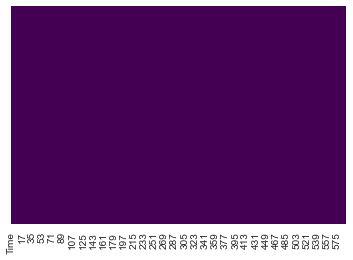

In [13]:
sns.heatmap(ddf.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

In [14]:
ddf['Pass/Fail'] = ddf['Pass/Fail'].replace(-1, 0)
ddf.drop('Time', axis = 1, inplace = True)

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

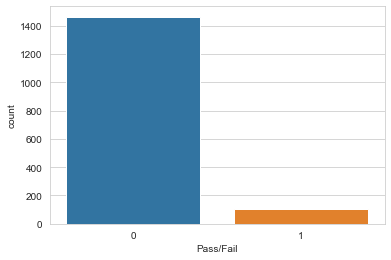

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'Pass/Fail', data = ddf)

In [16]:
#######Define features and target variable
X = ddf.drop('Pass/Fail', axis = 1).values
y = ddf['Pass/Fail'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [18]:
lcv = LassoCV()
lcv.fit(X, y)
lcv.score(X, y)
lcv_mask = lcv.coef_ > 0
sum(lcv_mask)

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005897219179423985, tolerance: 0.005712689545091783
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007225698763967614, tolerance: 0.005712689545091783
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009882188782867729, tolerance: 0.005712689545091783
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_

5

In [19]:
rfe_rf = RFE(estimator = RandomForestClassifier(), n_features_to_select = 50, step = 5)
rfe_rf.fit(X, y)
rf_mask = rfe_rf.support_

In [20]:
rfe_gb = RFE(estimator = GradientBoostingClassifier(), n_features_to_select = 50, step = 5)
rfe_gb.fit(X, y)
gb_mask = rfe_gb.support_

In [21]:
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis = 0)
mask = votes >= 1
reduced_X = X[:, mask]
reduced_X.shape

(1567, 79)

In [22]:
X = reduced_X

In [23]:
X.shape

(1567, 79)

In [24]:
sm = SMOTE(random_state=42)

In [25]:
X_res, y_res = sm.fit_resample(X, y)

### Logistic Regression

**************************************************
AUC: 0.850
**************************************************
Accuracy: 0.764
**************************************************
F1 Score: 0.760
**************************************************
Recall Score: 0.749
**************************************************
Precision Score: 0.772


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


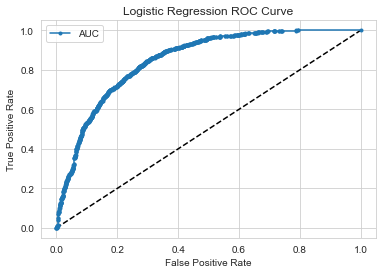

In [27]:
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_res, y_res)
y_predicted = logmodel.predict(X_res)
y_pred_probs = logmodel.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = logmodel.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)

print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)

#score['Logistic Regression'] = [test_auc, test_acc]

# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Hyperparameter Tuning

In [28]:
param_grid = {'tol':[0.1, 0.01, 0.001, 0.0001, 0.0002, 0.0003], 'C':[1, 10], 
              'solver':('sag', 'saga', 'lbfgs', 'liblinear'), 'max_iter':[20, 40, 60, 80, 100], 
              'multi_class':['auto', 'ovr', 'multinomial']} 
model = LogisticRegression()
clf = GridSearchCV(model, param_grid, cv = 10, scoring = 'f1', verbose = 3, return_train_score = True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.537, test=0.525), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.553, test=0.548), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.490, test=0.409), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.550, test=0.534), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.628, test=0.627), total=   0.0s
[CV] C=1, max_iter=20, multi_c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.551, test=0.527), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.400, test=0.425), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.1, score=(train=0.518, test=0.486), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.561, test=0.535), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.549, test=0.524), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.548, test=0.494), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.556, test=0.561), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.576, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.586, test=0.574), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.594, test=0.561), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.570, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.561, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.559, test=0.536), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.552, test=0.520), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.552, test=0.498), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.557, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.572, test=0.560), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.578, test=0.564), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.588, test=0.565), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.594, test=0.559), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.572, test=0.580), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.561, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.569, test=0.533), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.563

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.555, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.584, test=0.569), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.588, test=0.565), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.594, test=0.564), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.574, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.559, test=0.511), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.583, test=0.535), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.551, test=0.524), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.556, test=0.498), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.556, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.570, test=0.555), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.584, test=0.574), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.587, test=0.567), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.597, test=0.564), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.573, test=0.578), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.561, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.557, test=0.535), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.548, test=0.518), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.549, test=0.494), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.561, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.583, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.586, test=0.572), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.591, test=0.563), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.588, test=0.556), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.577, test=0.587), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.551, test=0.498), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.1, score=(train=0.539, test=0.534), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.1, score=(train=0.549, test=0.555), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.1, score=(train=0.551, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.549, test=0.519), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.543, test=0.537), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.556, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.552, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.573, test=0.562), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.589, test=0.583), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.584, test=0.573), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.575, test=0.539), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.567, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.548, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.548, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.543, test=0.526), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.557, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.551, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.571, test=0.560), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.588, test=0.578), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.574, test=0.534), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.566, test=0.559), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.547, test=0.491), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.548, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.545, test=0.533), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.557, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.550, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.573, test=0.568), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.589, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.574, test=0.539), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.567, test=0.558), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.548, test=0.493), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.550, test=0.524), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.543, test=0.526), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.552, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.570, test=0.562), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.588, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.585, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.574, test=0.539), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.567, test=0.559), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.547, test=0.484), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.553, test=0.529), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.544, test=0.524), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.557, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.552, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.572, test=0.562), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.588, test=0.585), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.585, test=0.577), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.575, test=0.539), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.567, test=0.559), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.548, test=0.491), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total= 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.582, test=0.539), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.588, test=0.569), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.578, test=0.534), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.597, test=0.579), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.585, test=0.568), total=   0.0s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.719, test=0.762), total=   0.2s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.726, test=0.738), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.713, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.719, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.726, test=0.738), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.713, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.719, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.726, test=0.738), total=   0.2s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.713, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.719, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.726, test=0.738), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.713, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.719, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.726, test=0.738), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.713, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.507, test=0.527), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.528, test=0.508), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.599, test=0.550), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.503, test=0.514), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.584, test=0.565), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.596, test=0.609), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.584, test=0.573), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.593, test=0.550), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.577, test=0.578), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.566, test=0.535), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.554, test=0.496), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.554, test=0.560), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.577, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.585, test=0.572),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.585, test=0.569), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.590, test=0.558), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.574, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.559, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.558, test=0.538), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.555, test=0.520), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.554, test=0.498), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.556, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.570, test=0.555), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.584, test=0.574), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.588, test=0.565), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.593, test=0.565), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.572, test=0.584), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.561, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.558, test=0.532), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.560, test=0.520), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.553, test=0.498), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.555, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.573, test=0.555), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.582, test=0.564), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.592, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.593, test=0.561), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.576, test=0.587), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.561, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.566, test=0.536), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.557, test=0.520), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.553, test=0.498), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.557, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.571, test=0.555), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.585, test=0.574), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.588, test=0.565), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.594, test=0.564), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.578, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.566, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.563, test=0.535), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.555, test=0.520), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.552, test=0.493), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.557, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.573, test=0.560), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.591, test=0.575), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.588, test=0.565), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.591, test=0.563), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.573, test=0.575), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.556, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.542, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.553, test=0.577), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.532, test=0.543), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.445, test=0.435), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.638, test=0.591), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.553, test=0.512), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.550, test=0.514)

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.542, test=0.526), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.556, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.553, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.573, test=0.562), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.587, test=0.583), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.585, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.575, test=0.539), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.567, test=0.559), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.547, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.549, test=0.524), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.546, test=0.538), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.556, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.552, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.571, test=0.562), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.589, test=0.581), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.583, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.575, test=0.537), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.568, test=0.558), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.547, test=0.484), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.549, test=0.519), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.544, test=0.526), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.557, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.553, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.574, test=0.562), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.588, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.575, test=0.539), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.568, test=0.562), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.548, test=0.491), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.549, test=0.524), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.544, test=0.531), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.556, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.551, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.574, test=0.568), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.588, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.583, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.537), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.568, test=0.558), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.546, test=0.484), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.548, test=0.514), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.543, test=0.526), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.558, test=0.487), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.552, test=0.550), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.572, test=0.562), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.588, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.576, test=0.537), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Attribu

[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.567, test=0.561), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.545, test=0.485), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[C

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total= 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.655, test=0.563), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.571, test=0.513), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.582, test=0.539), total=   0.0s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.719, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.726, test=0.738), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.713, test=0.762), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.719, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.726, test=0.738), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.713, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 ..
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.719, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.726, test=0.738), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.713, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.742, test=0.727), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.728, test=0.764), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.719, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.726, test=0.738), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.713, test=0.762), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.719, test=0.680), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.702, test=0.741), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.702, test=0.490), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.731, test=0.604), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.742, test=0.727), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.728, test=0.764), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.719, test=0.762), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.726, test=0.738), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.713, test=0.762), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.719, test=0.680), total=   0.2s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.702, test=0.741), total=   0.1s
[CV] C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 .
[CV]  C=1, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.677, test=0.720), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.688, test=0.665), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.608, test=0.544), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.541, test=0.491), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sa

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.582, test=0.540), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.571, test=0.512), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.569, test=0.517), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.574, test=0.578), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.582, test=0.593), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.583, test=0.545), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.601, test=0.567), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.606, test=0.568), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.590, test=0.606), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.568, test=0.538), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.585, test=0.544), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.572, test=0.519), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.582, test=0.526), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.575, test=0.588), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.566, test=0.559), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.585, test=0.547), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.593, test=0.549), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.604, test=0.564), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.570, test=0.583), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.570, test=0.542), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.582, test=0.544), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.580, test=0.521), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.572, test=0.522), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.574, test=0.590), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.586, test=0.547), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=mult

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.607, test=0.573), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.551, test=0.579), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.574, test=0.553), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.585, test=0.544), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.581, test=0.522), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.589, test=0.545), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.549, test=0.512), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.575, test=0.539), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.594, test=0.543), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.622, test=0.591), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.583, test=0.595), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.577, test=0.557), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.582, test=0.546), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.579, test=0.521), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.560, test=0.496), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.576, test=0.583), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.564, test=0.553), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.575, test=0.541), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.596, test=0.553), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.607, test=0.581), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.586, test=0.603), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.562, test=0.539), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.543, test=0.516), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.536, test=0.538), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.557, test=0.489), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.540, test=0.542), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=20, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.563, test=0.536), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.552, test=0.520), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.552, test=0.498), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.556, test=0.561), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.587, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.590, test=0.563), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.593, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.573, test=0.586), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.560, test=0.511), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.567, test=0.536), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.560, test=0.518), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.553, test=0.496), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.557, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.583, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.582, test=0.569), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.588, test=0.563), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.592, test=0.561), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.575, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.562, test=0.511), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.565, test=0.536), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.562, test=0.525), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.551, test=0.493), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.554, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.576, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.583, test=0.567), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.587, test=0.567), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.594, test=0.563), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.574, test=0.580), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.559, test=0.511), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.563, test=0.536), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.557, test=0.520), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.549, test=0.494), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.556, test=0.571), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.587, test=0.569), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.585, test=0.568), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.593, test=0.560), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.572, test=0.584), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.558, test=0.511), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.570, test=0.535), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.561, test=0.518), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.555, test=0.496), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.560, test=0.577), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.580, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.580, test=0.569), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.588, test=0.565), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.594, test=0.566), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.577, test=0.589), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.563, test=0.509), total=   0.1s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial,

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfg

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, s

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multino

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=mult

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=20, multi_class=mult

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=mult

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fi

[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=20, multi_cla

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.575, test=0.521), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.576, test=0.526), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.584, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.595, test=0.551), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.608, test=0.564), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.584, test=0.594), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.576, test=0.552), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.584, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.572, test=0.519), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.578, test=0.524), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.584, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.596, test=0.556), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.585, test=0.599), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.575, test=0.543), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.583, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.577, test=0.516), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.578, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.574, test=0.570), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.584, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.595, test=0.551), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.608, test=0.564), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.584, test=0.594), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.576, test=0.553), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.584, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.576, test=0.521), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.575, test=0.524), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.577, test=0.570), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.585, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.595, test=0.551), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.583, test=0.596), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.577, test=0.545), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.585, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.577, test=0.521), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.575, test=0.524), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.577, test=0.576), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.583, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.594, test=0.551), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.584, test=0.592), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.579, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.539, test=0.534), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.547, test=0.559), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.403, test=0.327), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.540, test=0.548), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.541, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.551, test=0.494), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.557, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.584, test=0.574), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.595, test=0.564), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.573, test=0.580), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.559, test=0.509), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.556, test=0.533), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.557, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.553, test=0.498), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.556, test=0.561), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.577, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.586, test=0.573), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.595, test=0.564), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.574, test=0.580), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.560, test=0.509), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.564, test=0.536), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.552, test=0.498), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.557, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.580, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.585, test=0.575), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.596, test=0.568), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.572, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.560, test=0.509), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.564, test=0.536), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.553, test=0.494), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.556, test=0.561), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.580, test=0.566), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.585, test=0.575), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.596, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.574, test=0.580), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.559, test=0.509), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.563, test=0.536), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.558, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.552, test=0.494), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.556, test=0.561), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.585, test=0.574), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.595, test=0.566), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.574, test=0.589), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.558, test=0.511), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan)

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.655, test=0.563), total=   0.1s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.571, test=0.513), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.582, test=0.539), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.588, test=0.569), total=   0.0s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.760, test=0.614), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.750, test=0.718), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.732, test=0.776), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.732, test=0.760), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.730, test=0.730), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.732, test=0.762), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.723, test=0.762), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.760, test=0.614), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.763, test=0.748), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.751, test=0.767), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.728, test=0.797), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.759, test=0.803), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.730, test=0.730), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.731, test=0.760), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.751, test=0.764), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.760, test=0.614), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.748), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.751, test=0.767), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.759, test=0.803), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.730, test=0.730), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.731, test=0.760), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.751, test=0.764), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.760, test=0.614), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.748), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.751, test=0.767), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.759, test=0.803), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.730, test=0.730), total=   0.2s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.731, test=0.760), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.751, test=0.764), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.775, test=0.580), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.760, test=0.614), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.748), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.751, test=0.767), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.759, test=0.803), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.746, test=0.782), total=   0.4s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.730, test=0.730), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.731, test=0.760), total=   0.3s
[CV] C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.751, test=0.764), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.395, test=0.417), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.444, test=0.420), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.544, test=0.483), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.555, test=0.558), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.560, test=0.5

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.583, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.578, test=0.528), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.578, test=0.524), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.585, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.598, test=0.551), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.585, test=0.599), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.575, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.581, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.578, test=0.523), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.575, test=0.526), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.576, test=0.576), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.583, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.595, test=0.545), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.608, test=0.573), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.585, test=0.598), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.576, test=0.548), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.584, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.578, test=0.521), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.577, test=0.524), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.581, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.596, test=0.551), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.583, test=0.594), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.575, test=0.548), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.583, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.574, test=0.524), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.573, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.575, test=0.576), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.585, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.599, test=0.554), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.607, test=0.573), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.586, test=0.603), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.575, test=0.550), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.584, test=0.544), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.574, test=0.524), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.579, test=0.524), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.576, test=0.570), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.587, test=0.547), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.595, test=0.551), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.586, test=0.605), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.577, test=0.545), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.546, test=0.533), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.541, test=0.545), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.563, test=0.504), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.572, test=0.577), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.544, test=0.532), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.551, test=0.598), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.518, test=0.520), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.564, test=0.516),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.562, test=0.538), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.551, test=0.493), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.555, test=0.561), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.577, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.586, test=0.574), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.594, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.575, test=0.587), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.560, test=0.509), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.562, test=0.536), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.555, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.553, test=0.493), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.556, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.585, test=0.574), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.588, test=0.563), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.594, test=0.559), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.572, test=0.580), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.558, test=0.511), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.563, test=0.538), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.558, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.552, test=0.493), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.557, test=0.561), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.572), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.595, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.572, test=0.580), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.560, test=0.509), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.564, test=0.535), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.552, test=0.498), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.555, test=0.561), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.578, test=0.566), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.586, test=0.574), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.588, test=0.565), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.594, test=0.564), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.574, test=0.587), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.559, test=0.509), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.561, test=0.533), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.556, test=0.520), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.552, test=0.498), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.556, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.577, test=0.566), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.584, test=0.574), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.589, test=0.563), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.593, test=0.566), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Attribu

[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.574, test=0.580), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.560, test=0.509), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.569, test=0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.760, test=0.614), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.750, test=0.718), total=   0.1s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.732, test=0.776), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.732, test=0.760), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.730, test=0.730), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.732, test=0.762), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.723, test=0.762), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.760, test=0.614), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.763, test=0.748), total=   0.4s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.751, test=0.767), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..
[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.759, test=0.803), total=   0.4s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.730, test=0.730), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.731, test=0.760), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.751, test=0.764), total=   0.4s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.760, test=0.614), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.748), total=   0.5s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.751, test=0.767), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.759, test=0.803), total=   0.4s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.730, test=0.730), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.731, test=0.760), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.751, test=0.764), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.760, test=0.614), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.748), total=   0.4s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.751, test=0.767), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.759, test=0.803), total=   0.4s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.730, test=0.730), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.731, test=0.760), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.751, test=0.764), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.775, test=0.580), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.760, test=0.614), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.748), total=   0.4s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.751, test=0.767), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.759, test=0.803), total=   0.4s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.746, test=0.782), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.730, test=0.730), total=   0.2s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.731, test=0.760), total=   0.3s
[CV] C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.751, test=0.764), total=   0.3s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.478, test=0.479), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.498, test=0.484), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.590, test=0.541), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.424, test=0.424), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.600, test=0.545), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.601, test=0.527), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.587, test=0.546), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.591, test=0.618), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.601, test=0.559), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.607, test=0.563), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.605, test=0.626), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.585, test=0.589), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.600, test=0.543), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.600, test=0.534), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.588, test=0.541), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.576, test=0.574), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.590, test=0.610), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.598, test=0.559), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.609, test=0.561), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.602, test=0.619), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.586, test=0.585), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.600, test=0.543), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.596, test=0.509), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.591, test=0.546), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.575, test=0.574), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.589, test=0.613), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.604, test=0.569), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.611, test=0.561), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.602, test=0.619), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.584, test=0.589), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.599, test=0.544), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.598, test=0.519), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.587, test=0.546), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.574, test=0.574), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.612, test=0.562), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.598, test=0.559), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.610, test=0.561), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.603, test=0.623), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.588, test=0.587), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.604, test=0.545), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.596, test=0.509), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.589, test=0.546), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.575, test=0.574), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.590, test=0.613), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.610, test=0.559), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.603, test=0.564), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.609, test=0.561), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.605, test=0.623), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.587, test=0.587), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.542, test=0.523), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.530, test=0.521), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.556, test=0.489), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.558, test=0.557), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=40, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.583, test=0.544), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.577, test=0.523), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.582, test=0.526), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.572, test=0.587), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.577, test=0.576), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.596, test=0.560), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.608, test=0.573), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.585, test=0.598), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.577, test=0.555), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.585, test=0.544), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.576, test=0.528), total=   0.3s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.577, test=0.526), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.573, test=0.582), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.576, test=0.570), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.584, test=0.547), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.597, test=0.556), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.609, test=0.568), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.585, test=0.594), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.578, test=0.548), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.584, test=0.544), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.579, test=0.528), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.573, test=0.520), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.572, test=0.587), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.577, test=0.570), total=   0.3s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.587, test=0.545), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.596, test=0.556), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.608, test=0.564), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.584, test=0.594), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.577, test=0.550), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.584, test=0.544), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.580, test=0.524), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.579, test=0.531), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.572, test=0.587), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.576, test=0.570), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.584, test=0.547), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.596, test=0.551), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.584, test=0.594), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.576, test=0.545), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.584, test=0.544), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.577, test=0.528), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.577, test=0.526), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.572, test=0.587), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.577, test=0.579), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.586, test=0.547), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.596, test=0.551), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.584, test=0.594), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.583, test=0.560), total=   0.2s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=40, multi_class

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.001 
[CV]  C=1, max_it

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.594, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.589, test=0.507), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.587, test=0.532), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.575, test=0.562), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.581, test=0.600), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.593, test=0.561), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.596, test=0.604), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.584, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.593, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.586, test=0.503), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.589, test=0.530), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.575, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.580, test=0.600), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.601, test=0.544), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.593, test=0.558), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.598, test=0.599), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.584, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.591, test=0.539), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.589, test=0.536), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.574, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.581, test=0.605), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.602, test=0.542), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.591, test=0.556), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.600, test=0.613), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.584, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.594, test=0.556), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.589, test=0.532), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.575, test=0.562), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.581, test=0.600), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.603, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.590, test=0.558), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.604, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.601, test=0.608), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.583, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.593, test=0.537), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.587, test=0.534), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.572, test=0.562), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.580, test=0.600), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.590, test=0.561), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.597, test=0.608), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.584, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.537, test=0.538), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.539, test=0.541), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.551, test=0.487), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.539, test=0.544), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.543, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.569, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.564, test=0.504), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.569, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.581, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.578, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.597, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.601, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.579, test=0.584), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.567, test=0.534), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.572, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.564, test=0.506), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.570, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.578, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.603, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.578, test=0.580), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.566, test=0.524), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.563, test=0.506), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.570, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.602, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.577, test=0.580), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.567, test=0.529), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.570, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.567, test=0.502), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.571, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.602, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.577, test=0.580), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.566, test=0.524), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.569, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.564, test=0.506), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.569, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.601, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.577, test=0.580), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=1, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.567, test=0.524), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=na

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.761, test=0.618), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.750, test=0.718), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.732, test=0.776), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.732, test=0.760), total=   0.1s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.735, test=0.751), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.732, test=0.762), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 ..
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.723, test=0.762), total=   0.2s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.761, test=0.618), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.773, test=0.759), total=   0.6s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.760, test=0.745), total=   0.5s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.738, test=0.784), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.764, test=0.799), total=   0.7s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.755, test=0.829), total=   0.5s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.735, test=0.751), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.738, test=0.757), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.762, test=0.760), total=   0.6s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.785, test=0.582), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.761, test=0.618), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.770, test=0.754), total=   0.7s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.760, test=0.745), total=   0.5s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.738, test=0.784), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.764, test=0.799), total=   0.7s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.755, test=0.829), total=   0.6s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.735, test=0.751), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.738, test=0.757), total=   0.5s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.762, test=0.760), total=   0.6s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.761, test=0.618), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.770, test=0.754), total=   0.7s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.760, test=0.745), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.738, test=0.784), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.764, test=0.799), total=   0.8s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.755, test=0.829), total=   0.5s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.735, test=0.751), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.738, test=0.757), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.762, test=0.760), total=   0.5s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.761, test=0.618), total=   0.3s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.770, test=0.754), total=   0.7s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.760, test=0.745), total=   0.5s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.738, test=0.784), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.764, test=0.799), total=   0.7s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.755, test=0.829), total=   0.5s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.735, test=0.751), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.738, test=0.757), total=   0.4s
[CV] C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.762, test=0.760), total=   0.5s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.554, test=0.542), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.550, test=0.552), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.526, test=0.459), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.548, test=0.543), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.484, test=0.4

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.591, test=0.539), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.589, test=0.532), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.573, test=0.562), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.580, test=0.598), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.601, test=0.549), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.590, test=0.558), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.599, test=0.604), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.582, test=0.571), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.592, test=0.542), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.586, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.589, test=0.534), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.574, test=0.564), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.581, test=0.598), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.602, test=0.552), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.592, test=0.556), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.598, test=0.608), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.592, test=0.539), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.589, test=0.532), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.574, test=0.562), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.581, test=0.600), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.589, test=0.558), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.600, test=0.608), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.592, test=0.539), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.587, test=0.534), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.575, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.582, test=0.600), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.593, test=0.563), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.598, test=0.608), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.593, test=0.542), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.588, test=0.530), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.574, test=0.562), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.581, test=0.602), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.591, test=0.558), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.601, test=0.608), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.541, test=0.539), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.548, test=0.564), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.545, test=0.480), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.570, test=0.5

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.566, test=0.504), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.570, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.584, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.579, test=0.551), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.597, test=0.574), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.601, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.577, test=0.580), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.566, test=0.529), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.573, test=0.535), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.568, test=0.520), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.565, test=0.504), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.570, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.583, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.579, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.598, test=0.574), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.601, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.578, test=0.580), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.567, test=0.534), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.566, test=0.506), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.570, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.579, test=0.549), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.597, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.601, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.579, test=0.584), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.572, test=0.538), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.572, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.565, test=0.504), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.572, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.583, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.598, test=0.574), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.602, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.580), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.566, test=0.524), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.567, test=0.520), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.565, test=0.506), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.571, test=0.585), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.581, test=0.554), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.597, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.601, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.578, test=0.584), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=1, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.567, test=0.524), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 


[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=60,

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.655, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.761, test=0.618), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.750, test=0.718), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.732, test=0.776), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.728, test=0.797), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.732, test=0.760), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.735, test=0.751), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.732, test=0.762), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ...
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.723, test=0.762), total=   0.2s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.761, test=0.618), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..
[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.773, test=0.759), total=   0.6s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.760, test=0.745), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.738, test=0.784), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.764, test=0.799), total=   0.7s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.755, test=0.829), total=   0.5s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.735, test=0.751), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.738, test=0.757), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.762, test=0.760), total=   0.5s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.761, test=0.618), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.770, test=0.754), total=   0.7s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.760, test=0.745), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.738, test=0.784), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.764, test=0.799), total=   0.7s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.755, test=0.829), total=   0.5s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.735, test=0.751), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.738, test=0.757), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.762, test=0.760), total=   0.5s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.761, test=0.618), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.770, test=0.754), total=   0.7s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.760, test=0.745), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.738, test=0.784), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.764, test=0.799), total=   0.7s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.755, test=0.829), total=   0.6s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.735, test=0.751), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.738, test=0.757), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.762, test=0.760), total=   0.5s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.785, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.761, test=0.618), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.770, test=0.754), total=   0.7s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.760, test=0.745), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.738, test=0.784), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.764, test=0.799), total=   0.7s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.755, test=0.829), total=   0.5s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.735, test=0.751), total=   0.3s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.738, test=0.757), total=   0.4s
[CV] C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.762, test=0.760), total=   0.5s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.597, test=0.571), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.455, test=0.391), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.581, test=0.521), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.635, test=0.625), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.615, test=0.533), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.625, test=0.525), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.604, test=0.563), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.582, test=0.593), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.602, test=0.633), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.618, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.618, test=0.586), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.625, test=0.574), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.604, test=0.620), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.595, test=0.599), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.615, test=0.537), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.624, test=0.525), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.603, test=0.560), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.581, test=0.593), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.601, test=0.633), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.619, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.616, test=0.586), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.624, test=0.576), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.607, test=0.627), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.595, test=0.604), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.615, test=0.533), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.624, test=0.525), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.603, test=0.563), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.580, test=0.593), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.602, test=0.633), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.620, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.618, test=0.586), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.625, test=0.574), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.608, test=0.623), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.596, test=0.604), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.616, test=0.537), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.624, test=0.523), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.604, test=0.560), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.584, test=0.593), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.602, test=0.635), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.620, test=0.569), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.616, test=0.581), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.623, test=0.576), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.606, test=0.623), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.595, test=0.599), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.615, test=0.537), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.624, test=0.525), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.604, test=0.560), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.580, test=0.593), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.601, test=0.633), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.621, test=0.569), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.618, test=0.586), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.627, test=0.574), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.604, test=0.620), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.594, test=0.599), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.524, test=0.523), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.537, test=0.543), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.556, test=0.493), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.519, test=0.534), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=60, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.591, test=0.537), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.586, test=0.503), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.587, test=0.536), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.575, test=0.562), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.581, test=0.605), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.603, test=0.547), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.592, test=0.563), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.606, test=0.567), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.600, test=0.613), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.584, test=0.577), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.593, test=0.547), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.587, test=0.509), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.589, test=0.532), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.578, test=0.567), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.582, test=0.605), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.591, test=0.558), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.606, test=0.567), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.600, test=0.613), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.585, test=0.582), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.594, test=0.551), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.588, test=0.509), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.588, test=0.534), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.576, test=0.572), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.582, test=0.603), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.591, test=0.563), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.600, test=0.613), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.585, test=0.577), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.593, test=0.547), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.587, test=0.509), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.588, test=0.532), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.578, test=0.569), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.581, test=0.600), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.591, test=0.558), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.606, test=0.567), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.599, test=0.613), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.584, test=0.577), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.593, test=0.551), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.587, test=0.509), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.589, test=0.534), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.576, test=0.572), total=   0.2s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.581, test=0.602), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.590, test=0.558), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.606, test=0.567), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.600, test=0.613), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.584, test=0.577), total=   0.3s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn

[CV]  C=1, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=60, multi_c

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.599, test=0.519), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.587, test=0.546), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.590, test=0.613), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.610, test=0.564), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.608, test=0.563), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.606, test=0.632), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.588, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.600, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.599, test=0.519), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.585, test=0.541), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.591, test=0.615), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.608, test=0.563), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.606, test=0.632), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.588, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.599, test=0.519), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.586, test=0.541), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.577, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.609, test=0.562), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.600, test=0.564), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.610, test=0.563), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.603, test=0.619), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.589, test=0.585), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.598, test=0.519), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.586, test=0.546), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.575, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.599, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.610, test=0.561), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.604, test=0.619), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.588, test=0.585), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.599, test=0.524), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.586, test=0.541), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.610, test=0.561), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.606, test=0.632), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.588, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.538, test=0.532), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.530, test=0.540), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.548, test=0.487), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.482, test=0.494), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.553, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.586, test=0.544), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.576, test=0.528), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.577, test=0.526), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.573, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.576, test=0.570), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.585, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.598, test=0.556), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.584, test=0.594), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.576, test=0.543), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.584, test=0.544), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.577, test=0.530), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.579, test=0.526), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.578, test=0.570), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.597, test=0.556), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.584, test=0.594), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.577, test=0.543), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.585, test=0.544), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.576, test=0.530), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.576, test=0.526), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.577, test=0.570), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.595, test=0.551), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.584, test=0.594), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.579, test=0.545), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.585, test=0.544), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.578, test=0.528), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.576, test=0.520), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.572, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.577, test=0.570), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.598, test=0.556), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.585, test=0.599), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.577, test=0.545), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.586, test=0.544), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.578, test=0.528), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.577, test=0.526), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.572, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.577, test=0.570), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.584, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.597, test=0.556), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.585, test=0.599), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=1, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.577, test=0.543), total=   0.3s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), tot

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.569, t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.787, test=0.574), total=   0.4s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.763, test=0.616), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.773, test=0.759), total=   0.7s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.767, test=0.753), total=   0.7s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.748, test=0.777), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.771, test=0.803), total=   1.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.759, test=0.842), total=   0.8s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.761, test=0.764), total=   0.6s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.738, test=0.757), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.764, test=0.759), total=   0.8s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.787, test=0.574), total=   0.4s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.616), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.775, test=0.759), total=   0.9s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.767, test=0.753), total=   0.7s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.748, test=0.777), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.803), total=   0.9s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.759, test=0.842), total=   0.8s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.761, test=0.764), total=   0.6s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.738, test=0.757), total=   0.6s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.764, test=0.759), total=   0.9s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.787, test=0.574), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.616), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.775, test=0.759), total=   1.2s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.767, test=0.753), total=   0.8s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.748, test=0.777), total=   0.6s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.803), total=   1.0s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.759, test=0.842), total=   0.9s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.761, test=0.764), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.738, test=0.757), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.764, test=0.759), total=   0.8s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.787, test=0.574), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.616), total=   0.5s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.775, test=0.759), total=   0.9s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.767, test=0.753), total=   0.7s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.748, test=0.777), total=   0.6s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.803), total=   0.9s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.759, test=0.842), total=   0.9s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.761, test=0.764), total=   0.7s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.738, test=0.757), total=   0.6s
[CV] C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.764, test=0.759), total=   0.8s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.550, test=0.534), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.517, test=0.504), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.553, test=0.489), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.617, test=0.630), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 ..........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.525, test=0.5

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.602, test=0.545), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.599, test=0.519), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.587, test=0.546), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.575, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.590, test=0.618), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.599, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.609, test=0.561), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.605, test=0.628), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 .........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.589, test=0.585), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.599, test=0.524), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.585, test=0.541), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.608, test=0.561), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.606, test=0.632), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.588, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.599, test=0.524), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.586, test=0.541), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.609, test=0.559), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.608, test=0.563), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.605, test=0.632), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.588, test=0.585), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.599, test=0.524), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.584, test=0.541), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.608, test=0.554), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.608, test=0.563), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.604, test=0.623), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.587, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.597, test=0.524), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.585, test=0.541), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.590, test=0.613), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.610, test=0.559), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.608, test=0.563), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.605, test=0.623), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.588, test=0.589), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.547, test=0.544), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.503, test=0.518), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.534, test=0.462), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.526, test=0.553), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 .........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.542, test=0.545

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.584, test=0.544), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.577, test=0.528), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.575, test=0.520), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.572, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.578, test=0.570), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.584, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.597, test=0.556), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.584, test=0.599), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.577, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.586, test=0.544), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.577, test=0.528), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.577, test=0.526), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.576, test=0.570), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.597, test=0.556), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.584, test=0.594), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.576, test=0.545), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.544), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.577, test=0.528), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.579, test=0.526), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.572, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.577, test=0.570), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.595, test=0.553), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.599), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.578, test=0.543), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.585, test=0.544), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.528), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.526), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.572, test=0.587), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.570), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.585, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.598, test=0.556), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.584, test=0.599), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.577, test=0.545), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.585, test=0.544), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.577, test=0.528), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.576, test=0.520), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.573, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.576, test=0.570), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.598, test=0.551), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.584, test=0.599), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=1, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.575, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 ........
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[C

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 .......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 ......
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), to

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 .....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.655, test=0.563), total=   0.1s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.571, test=0.513), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.582, test=0.539), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.588, test=0.569), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.578, test=0.534), total=   0.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ....
[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, sc

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.787, test=0.574), total=   0.4s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.763, test=0.616), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..
[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.773, test=0.759), total=   0.6s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.767, test=0.753), total=   0.7s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.748, test=0.777), total=   0.6s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.771, test=0.803), total=   1.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.759, test=0.842), total=   0.8s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.761, test=0.764), total=   0.6s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.738, test=0.757), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.764, test=0.759), total=   0.8s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.787, test=0.574), total=   0.4s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.616), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.775, test=0.759), total=   1.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.767, test=0.753), total=   0.7s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.748, test=0.777), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.803), total=   0.9s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.759, test=0.842), total=   0.8s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.761, test=0.764), total=   0.6s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.738, test=0.757), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.764, test=0.759), total=   0.8s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.787, test=0.574), total=   0.4s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.616), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.775, test=0.759), total=   0.9s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.767, test=0.753), total=   0.7s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.748, test=0.777), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.803), total=   0.9s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.759, test=0.842), total=   0.8s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.761, test=0.764), total=   0.6s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.738, test=0.757), total=   0.6s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.764, test=0.759), total=   0.8s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.787, test=0.574), total=   0.4s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.616), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.775, test=0.759), total=   1.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.767, test=0.753), total=   0.8s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.748, test=0.777), total=   0.6s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.803), total=   1.0s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.759, test=0.842), total=   0.9s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.761, test=0.764), total=   0.6s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.738, test=0.757), total=   0.5s
[CV] C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.764, test=0.759), total=   0.8s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.689, test=0.656), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.504, test=0.490), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.679, test=0.674), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.605, test=0.613), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 ..
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.630, test=0.538), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.640, test=0.539), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.615, test=0.588), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.601, test=0.628), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.611, test=0.640), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.629, test=0.572), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.633, test=0.603), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.631, test=0.581), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.613, test=0.633), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.605, test=0.618), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.629, test=0.538), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.637, test=0.539), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.613, test=0.578), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.598, test=0.620), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.610, test=0.640), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.629, test=0.567), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.633, test=0.599), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.631, test=0.581), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.613, test=0.633), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.604, test=0.615), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.629, test=0.538), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.639, test=0.539), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.615, test=0.588), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.601, test=0.623), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.612, test=0.640), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.630, test=0.572), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.633, test=0.601), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.633, test=0.581), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.612, test=0.633), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.606, test=0.611), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.629, test=0.538), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.638, test=0.539), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.615, test=0.588), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.600, test=0.620), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.610, test=0.640), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.628, test=0.567), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.631, test=0.599), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.632, test=0.581), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.614, test=0.638), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.604, test=0.613), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.629, test=0.538), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.641, test=0.539), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.612, test=0.578), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.597, test=0.618), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.611, test=0.640), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.629, test=0.567), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.629, test=0.596), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.633, test=0.581), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.612, test=0.633), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.608, test=0.618), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.536, test=0.527), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.534, test=0.551), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.549, test=0.478), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.542, test=0.540), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 .
[CV]  C=1, max_iter=80, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.602, test=0.545), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.597, test=0.524), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.585, test=0.541), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.576, test=0.579), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.591, test=0.613), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.609, test=0.562), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.609, test=0.563), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.606, test=0.632), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.587, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.599, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.598, test=0.524), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.585, test=0.541), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.576, test=0.574), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.609, test=0.562), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.609, test=0.563), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.606, test=0.632), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.588, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.601, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.598, test=0.524), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.584, test=0.541), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.576, test=0.574), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.610, test=0.559), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.610, test=0.563), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.605, test=0.628), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.589, test=0.585), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.601, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.597, test=0.524), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.586, test=0.541), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.576, test=0.574), total=   0.4s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.609, test=0.562), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.609, test=0.563), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.604, test=0.619), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.587, test=0.587), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.603, test=0.547), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.599, test=0.524), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.586, test=0.541), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.576, test=0.574), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.591, test=0.610), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.609, test=0.562), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.609, test=0.563), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.605, test=0.628), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.588, test=0.585), total=   0.3s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.2s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=80, multi_

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.613, test=0.522), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.595, test=0.545), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.575, test=0.591), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.596, test=0.628), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.609, test=0.576), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.618, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.597, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.593, test=0.596), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.613, test=0.522), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.595, test=0.545), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.576, test=0.591), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.597, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.609, test=0.576), total=   0.2s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.617, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.597, test=0.621), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.594, test=0.596), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.612, test=0.522), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.596, test=0.545), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.575, test=0.591), total=   0.2s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.609, test=0.570), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.617, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.597, test=0.621), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.592, test=0.596), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.612, test=0.522), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.595, test=0.545), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.576, test=0.591), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.608, test=0.570), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.617, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.597, test=0.621), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.594, test=0.596), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.536, test=0.538), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.544, test=0.550), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.588, test=0.561), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.481, test=0.487), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.556

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.582, test=0.507), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.585, test=0.534), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.573, test=0.572), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.578, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.593, test=0.558), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.600, test=0.568), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.593, test=0.606), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.581, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.591, test=0.541), total=   0.4s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.584, test=0.534), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.573, test=0.572), total=   0.4s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.576, test=0.602), total=   0.4s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.592, test=0.542), total=   0.4s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.593, test=0.560), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.602, test=0.567), total=   0.4s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.591, test=0.597), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.581, test=0.562), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.583, test=0.512), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.584, test=0.534), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.573, test=0.572), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.577, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.592, test=0.542), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.594, test=0.563), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.602, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.593, test=0.606), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.581, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.584, test=0.534), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.572, test=0.572), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.577, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.592, test=0.542), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.594, test=0.560), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.602, test=0.568), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.593, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=1, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.581, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=1, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.655, test=0.563), total=   0.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1, score

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.788, test=0.575), total=   0.5s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.771, test=0.627), total=   0.6s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.773, test=0.759), total=   0.6s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.769, test=0.753), total=   0.7s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.765, test=0.762), total=   0.8s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.769, test=0.819), total=   1.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.762, test=0.842), total=   1.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.769, test=0.777), total=   0.8s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.763, test=0.738), total=   0.7s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.771, test=0.758), total=   1.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.788, test=0.575), total=   0.5s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.627), total=   0.6s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.782, test=0.765), total=   1.2s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.774, test=0.769), total=   1.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.765, test=0.762), total=   0.8s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.778, test=0.820), total=   1.2s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.762, test=0.842), total=   1.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.769, test=0.777), total=   0.8s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.738), total=   0.7s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.758), total=   1.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.788, test=0.575), total=   0.5s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.627), total=   0.6s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.782, test=0.765), total=   1.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.774, test=0.769), total=   1.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.765, test=0.762), total=   0.8s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.778, test=0.820), total=   1.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.762, test=0.842), total=   1.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.769, test=0.777), total=   0.8s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.738), total=   0.7s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.758), total=   1.0s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.788, test=0.575), total=   0.5s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.627), total=   0.6s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.782, test=0.765), total=   1.2s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.774, test=0.769), total=   0.9s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.765, test=0.762), total=   0.8s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.778, test=0.820), total=   1.2s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.762, test=0.842), total=   1.1s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.769, test=0.777), total=   0.8s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.738), total=   0.7s
[CV] C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.758), total=   1.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.482, test=0.500), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.523, test=0.512), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.623, test=0.604), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.569, test=0.568), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.591, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.614, test=0.522), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.596, test=0.545), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.575, test=0.591), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.609, test=0.570), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.619, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.597, test=0.621), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.594, test=0.596), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.607, test=0.537), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.612, test=0.522), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.596, test=0.545), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.576, test=0.591), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.609, test=0.576), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.618, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.598, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.592, test=0.596), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.613, test=0.522), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.595, test=0.545), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.575, test=0.591), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.608, test=0.576), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.620, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.597, test=0.621), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.594, test=0.596), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.612, test=0.522), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.596, test=0.545), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.575, test=0.591), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.616, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.609, test=0.570), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.619, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.597, test=0.621), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.592, test=0.596), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.537, test=0.532), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.535, test=0.532), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.574, test=0.516), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.497, test=0.514), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.562, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.591, test=0.541), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.585, test=0.534), total=   0.4s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.572, test=0.572), total=   0.4s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.578, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.593, test=0.560), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.600, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.591, test=0.597), total=   0.4s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.579, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.534), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.573, test=0.572), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.578, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.593, test=0.560), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.601, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.592, test=0.597), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.581, test=0.569), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.591, test=0.541), total=   0.4s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.586, test=0.534), total=   0.4s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.574, test=0.572), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.577, test=0.602), total=   0.4s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.593, test=0.565), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.601, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.592, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.583, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.585, test=0.534), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.574, test=0.572), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.576, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.593, test=0.558), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.602, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.592, test=0.602), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=1, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.581, test=0.567), total=   0.3s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=1, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.655, test=0.563), total=   0.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1, score=(trai

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.788, test=0.575), total=   0.6s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.771, test=0.627), total=   0.6s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.773, test=0.759), total=   0.6s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.769, test=0.753), total=   0.7s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.765, test=0.762), total=   0.7s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.769, test=0.819), total=   1.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.762, test=0.842), total=   1.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.769, test=0.777), total=   0.8s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.763, test=0.738), total=   0.7s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.771, test=0.758), total=   1.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.788, test=0.575), total=   0.5s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.627), total=   0.6s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.782, test=0.765), total=   1.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.774, test=0.769), total=   0.9s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.765, test=0.762), total=   0.7s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.778, test=0.820), total=   1.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.762, test=0.842), total=   1.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.769, test=0.777), total=   0.8s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.738), total=   0.7s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.758), total=   1.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.788, test=0.575), total=   0.5s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.627), total=   0.6s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.782, test=0.765), total=   1.2s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.774, test=0.769), total=   0.9s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.765, test=0.762), total=   0.7s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.778, test=0.820), total=   1.2s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.762, test=0.842), total=   1.0s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.769, test=0.777), total=   0.8s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.738), total=   0.7s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.758), total=   1.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.788, test=0.575), total=   0.5s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.627), total=   0.6s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.782, test=0.765), total=   1.2s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.774, test=0.769), total=   0.9s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.765, test=0.762), total=   0.8s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.778, test=0.820), total=   1.2s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.762, test=0.842), total=   1.1s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.769, test=0.777), total=   0.8s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.738), total=   0.7s
[CV] C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.758), total=   1.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.460, test=0.466), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.617, test=0.568), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.490, test=0.410), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.252, test=0.209), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=1, max_iter=100, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.641, test=0.539), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.649, test=0.541), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.627, test=0.595), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.615, test=0.625), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.616, test=0.647), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.640, test=0.582), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.637, test=0.607), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.643, test=0.587), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.626, test=0.649), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.619, test=0.653), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.641, test=0.539), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.650, test=0.541), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.627, test=0.595), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.615, test=0.620), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.616, test=0.647), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.640, test=0.582), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.638, test=0.607), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.643, test=0.589), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.625, test=0.649), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.619, test=0.653), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.641, test=0.539), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.650, test=0.546), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.627, test=0.600), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.615, test=0.620), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.616, test=0.647), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.640, test=0.582), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.636, test=0.607), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.643, test=0.589), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.623, test=0.649), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.619, test=0.653), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.642, test=0.539), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.649, test=0.541), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.626, test=0.600), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.615, test=0.625), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.616, test=0.647), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.639, test=0.584), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.638, test=0.607), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.643, test=0.587), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.623, test=0.649), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.619, test=0.653), total=   0.3s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.539, test=0.518), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.540, test=0.560), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.553, test=0.483), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.544, test=0.542), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.606, test=0.537), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.613, test=0.522), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.596, test=0.545), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.575, test=0.591), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.597, test=0.626), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.616, test=0.569), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.609, test=0.570), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.620, test=0.569), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.598, test=0.626), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.594, test=0.596), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.607, test=0.537), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.612, test=0.522), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.596, test=0.545), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.576, test=0.591), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.596, test=0.626), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.615, test=0.569), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.608, test=0.570), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.619, test=0.569), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.597, test=0.621), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.594, test=0.596), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.607, test=0.542), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.612, test=0.522), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.596, test=0.545), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.576, test=0.591), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.597, test=0.626), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.616, test=0.569), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.609, test=0.570), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.619, test=0.569), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.597, test=0.621), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.591, test=0.596), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.607, test=0.537), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.613, test=0.522), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.595, test=0.545), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.576, test=0.591), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.596, test=0.628), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.616, test=0.569), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.608, test=0.570), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.619, test=0.569), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.597, test=0.621), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.596, test=0.596), total=   0.4s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.2s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.2s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn

[CV]  C=1, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=1, max_iter=1

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.566, test=0.535), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.555, test=0.520), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.551, test=0.494), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.558, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.579, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.579, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.587, test=0.565), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.591, test=0.556), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.575, test=0.580), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.01, score=(train=0.558, test=0.511), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.556, test=0.528), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.560, test=0.525), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.551, test=0.494), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.558, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.573, test=0.555), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.585, test=0.570), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.587, test=0.567), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.572, test=0.575), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.001, score=(train=0.555, test=0.505), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.568, test=0.536), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.543, test=0.515), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.553, test=0.496), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.559, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.571, test=0.549), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.584, test=0.574), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.586, test=0.567), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.590, test=0.556), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.576, test=0.589), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.565, test=0.509), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.557, test=0.532), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.557, test=0.520), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.553, test=0.498), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.556, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.577, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.583, test=0.572), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.587, test=0.565), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.593, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.572, test=0.575), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.557, test=0.509), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.551, test=0.493), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.558, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.570, test=0.549), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.585, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.587, test=0.565), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.594, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.568, test=0.575), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.559, test=0.511), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.1, score=(train=0.536, test=0.529), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.1, score=(train=0.533, test=0.543), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.1, score=(train=0.535, test=0.475), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.1, score=(train=0.5

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.550, test=0.519), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.542, test=0.528), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.556, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.551, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.571, test=0.568), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.583, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.574, test=0.539), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.567, test=0.559), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.01, score=(train=0.548, test=0.489), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.548, test=0.514), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.542, test=0.537), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.558, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.551, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.573, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.588, test=0.578), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.577, test=0.537), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.567, test=0.558), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.001, score=(train=0.548, test=0.493), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.546, test=0.514), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.543, test=0.531), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.558, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.554, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.571, test=0.560), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.589, test=0.581), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.583, test=0.573), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.574, test=0.539), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.567, test=0.558), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.548, test=0.493), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.549, test=0.519), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.544, test=0.526), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.556, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.552, test=0.556), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.572, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.587, test=0.580), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.584, test=0.568), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.573, test=0.539), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.568, test=0.559), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.548, test=0.491), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.550, test=0.519), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.543, test=0.526), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.556, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.552, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.570, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.589, test=0.581), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.584, test=0.573), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.575, test=0.537), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\User

[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.568, test=0.559), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.549, test=0.485), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=20, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.571, test=0.513), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.582, test=0.539), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.588, test=0.569), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.578, test=0.534), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.597, test=0.579), total=   0.0s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear,

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.729, test=0.794), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.729, test=0.794), total=   0.2s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.729, test=0.794), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.729, test=0.794), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.729, test=0.794), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.510, test=0.520), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.543, test=0.548), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.565, test=0.514), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.548, test=0.538), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.528, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.555, test=0.496), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.556, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.576, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.591, test=0.576), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.588, test=0.567), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.591, test=0.560), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.579, test=0.596), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.557, test=0.509), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.568, test=0.535), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.553, test=0.520), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.554, test=0.500), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.557, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.581, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.584, test=0.569), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.588, test=0.565), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.593, test=0.564), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.571, test=0.575), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.564, test=0.509), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.560, test=0.538), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.550, test=0.524), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.553, test=0.493), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.556, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.581, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.581, test=0.569), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.589, test=0.563), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.595, test=0.564), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.563, test=0.509), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.559, test=0.538), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.557, test=0.520), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.548, test=0.494), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.555, test=0.556), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.583, test=0.572), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.589, test=0.563), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.590, test=0.556), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.576, test=0.580), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.559, test=0.511), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.567, test=0.535), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.558, test=0.520), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.552, test=0.498), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.558, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.577, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.587, test=0.574), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.590, test=0.556), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.579, test=0.591), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.554, test=0.500), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.540, test=0.539), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.543, test=0.560), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.501, test=0.430), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.529, test=0.545), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.544, test=0.536), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.537, test=0.556), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.545, test=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.550, test=0.524), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.547, test=0.520), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.557, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.554, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.574, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.585, test=0.580), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.578, test=0.537), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.567, test=0.558), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.548, test=0.493), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.549, test=0.514), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.542, test=0.528), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.558, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.552, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.568, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.588, test=0.578), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.568, test=0.558), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.547, test=0.485), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.544, test=0.510), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.543, test=0.533), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.558, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.551, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.571, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.589, test=0.583), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.575, test=0.539), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.567, test=0.559), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.548, test=0.485), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.543, test=0.510), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.543, test=0.541), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.556, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.553, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.572, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.589, test=0.583), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.539), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.566, test=0.561), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.547, test=0.484), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.549, test=0.519), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.544, test=0.522), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.555, test=0.487), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.551, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.573, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.589, test=0.583), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.584, test=0.571), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.575, test=0.539), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.568, test=0.559), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.548, test=0.491), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan)

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=20, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.571, test=0.513), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.582, test=0.539), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.588, test=0.569), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.578, test=0.534), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.597, test=0.579), total=   0.0s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.729, test=0.794), total=   0.2s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.729, test=0.794), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.729, test=0.794), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.726, test=0.765), total=   0.2s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.729, test=0.794), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.725, test=0.764), total=   0.2s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.714, test=0.550), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.726, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.744, test=0.730), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.726, test=0.765), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.729, test=0.794), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.717, test=0.724), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.720, test=0.761), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.711, test=0.683), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.725, test=0.764), total=   0.1s
[CV] C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.711, test=0.751), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.677, test=0.632), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.490, test=0.453), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.562, test=0.511), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.547, test=0.560), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.655, test=0.689), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.532, test=0.525), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.580, test=0.563), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=20, multi_class=multinomial, solve

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.578, test=0.528), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.568, test=0.517), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.578, test=0.588), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.580, test=0.595), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.589, test=0.545), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.600, test=0.562), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.616, test=0.591), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.586, test=0.592), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.564, test=0.535), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.586, test=0.549), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.573, test=0.509), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.579, test=0.522), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.574, test=0.586), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.570, test=0.570), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.583, test=0.542), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.601, test=0.567), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.588, test=0.547), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.582, test=0.583), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.580, test=0.553), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.590, test=0.549), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.574, test=0.510), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.593, test=0.545), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.577, test=0.581), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.577, test=0.541), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.592, test=0.553), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.607, test=0.578), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.586, test=0.606), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.573, test=0.555), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.581, test=0.541), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.565, test=0.514), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.587, test=0.545), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.574, test=0.570), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.582, test=0.549), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.597, test=0.559), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.608, test=0.583), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.587, test=0.599), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.577, test=0.552), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.581, test=0.541), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.577, test=0.521), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.561, test=0.500), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.492, test=0.486), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.565, test=0.564), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.614, test=0.601), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.594, test=0.563), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.606, test=0.583), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.595, test=0.613), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.574, test=0.554), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.528, test=0.525), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.542, test=0.543), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.558, test=0.489), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multino

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.554, test=0.524), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.555, test=0.494), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.557, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.572, test=0.555), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.583, test=0.577), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.587, test=0.565), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.595, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.581, test=0.587), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.563, test=0.509), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.564, test=0.535), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.552, test=0.524), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.551, test=0.494), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.556, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.582, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.584, test=0.577), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.589, test=0.563), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.594, test=0.561), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.575, test=0.589), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.562, test=0.511), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.568, test=0.536), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.555, test=0.520), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.555, test=0.500), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.557, test=0.561), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.575, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.585, test=0.575), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.587, test=0.565), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.596, test=0.564), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.576, test=0.589), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.560, test=0.513), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.567, test=0.535), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.553, test=0.494), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.557, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.577, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.586, test=0.580), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.588, test=0.563), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.594, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.569, test=0.575), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.561, test=0.509), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.564, test=0.535), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.553, test=0.524), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.551, test=0.493), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.555, test=0.568), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.575, test=0.560), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.586, test=0.573), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.596, test=0.566), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.570, test=0.575), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.561, test=0.511), total=   0.1s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=20, multi_class=multinomial, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=20, multi_class=mul

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=20, multi

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=20, multi

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=20, multi

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=20, multi

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn

[CV]  C=10, max_iter=20, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=20, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.575, test=0.524), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.576, test=0.526), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.576, test=0.576), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.584, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.594, test=0.549), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.608, test=0.573), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.585, test=0.599), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.01, score=(train=0.576, test=0.545), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.584, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.577, test=0.528), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.576, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.582, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.596, test=0.556), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.585, test=0.599), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.001, score=(train=0.576, test=0.550), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.584, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.579, test=0.521), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.576, test=0.524), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.577, test=0.581), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.585, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.597, test=0.551), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.607, test=0.568), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.583, test=0.592), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.577, test=0.550), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.585, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.576, test=0.517), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.574, test=0.522), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.583, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.598, test=0.556), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.585, test=0.594), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.578, test=0.552), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.582, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.578, test=0.521), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.574, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.574, test=0.570), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.584, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.595, test=0.545), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.585, test=0.594), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.577, test=0.553), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.538, test=0.532), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.542, test=0.552), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.519, test=0.453), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.538, test=0.540), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.1, score=(train=0.545

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.554, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.553, test=0.498), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.557, test=0.561), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.580, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.585, test=0.577), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.595, test=0.564), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.572, test=0.580), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.01, score=(train=0.560, test=0.511), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.563, test=0.536), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.554, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.552, test=0.493), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.555, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.577, test=0.566), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.585, test=0.574), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.594, test=0.564), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.573, test=0.580), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.001, score=(train=0.559, test=0.511), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.562, test=0.536), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.552, test=0.494), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.557, test=0.561), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.586, test=0.573), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.588, test=0.563), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.594, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.574, test=0.580), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.558, test=0.511), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.565, test=0.535), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.552, test=0.498), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.557, test=0.561), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.576, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.584, test=0.574), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.590, test=0.565), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.595, test=0.564), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.573, test=0.580), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.561, test=0.509), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.563, test=0.535), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.555, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.552, test=0.498), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.555, test=0.561), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.578, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.586, test=0.575), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.589, test=0.565), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.595, test=0.561), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.573, test=0.580), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Attribu

[CV]  C=10, max_iter=40, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.559, test=0.511), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=na

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=40, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.611, test=0.490), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.571, test=0.513), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.582, test=0.539), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.588, test=0.569), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.578, test=0.534), total=   0.0s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear,

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.763, test=0.620), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.749, test=0.699), total=   0.1s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.734, test=0.783), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.750, test=0.788), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.737, test=0.785), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=40, multi_class=auto, solver=libli

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.728, test=0.732), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.735, test=0.747), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.728, test=0.765), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.787, test=0.571), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.763, test=0.620), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.761, test=0.741), total=   0.4s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.739, test=0.780), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.757, test=0.756), total=   0.4s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.738, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.732, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.728, test=0.732), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.755, test=0.760), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.736, test=0.772), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.787, test=0.571), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.620), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.761, test=0.741), total=   0.4s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.739, test=0.780), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.757, test=0.756), total=   0.4s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.738, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.732, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.728, test=0.732), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.755, test=0.760), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.736, test=0.772), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.787, test=0.571), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.620), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.761, test=0.741), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.739, test=0.780), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.757, test=0.756), total=   0.4s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.738, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.732, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.728, test=0.732), total=   0.2s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.755, test=0.760), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.736, test=0.772), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.787, test=0.571), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.620), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.761, test=0.741), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.739, test=0.780), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.757, test=0.756), total=   0.4s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.738, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.732, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.728, test=0.732), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.755, test=0.760), total=   0.3s
[CV] C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.736, test=0.772), total=   0.4s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.559, test=0.537), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.505, test=0.490), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.617, test=0.585), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.630, test=0.630), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.440, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.583, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.576, test=0.519), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.579, test=0.529), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.586, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.598, test=0.551), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.583, test=0.596), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.576, test=0.553), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.585, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.574, test=0.519), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.575, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.576, test=0.570), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.599, test=0.561), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.584, test=0.594), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.577, test=0.550), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.586, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.574, test=0.517), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.574, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.584, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.598, test=0.556), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.608, test=0.564), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.585, test=0.599), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.579, test=0.555), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.582, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.574, test=0.519), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.581, test=0.524), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.573, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.575, test=0.570), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.585, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.600, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.608, test=0.568), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.585, test=0.599), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.576, test=0.550), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.581, test=0.544), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.575, test=0.528), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.584, test=0.529), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.572, test=0.587), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.576, test=0.576), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.583, test=0.547), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.598, test=0.556), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.607, test=0.568), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.585, test=0.594), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.577, test=0.545), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.540, test=0.537), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.536, test=0.548), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.537, test=0.466), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.524, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.562, test=0.536), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.557, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.552, test=0.494), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.556, test=0.561), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.577, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.586, test=0.574), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.588, test=0.563), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.595, test=0.566), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.574, test=0.580), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.561, test=0.509), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.562, test=0.530), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.555, test=0.520), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.552, test=0.493), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.555, test=0.561), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.578, test=0.566), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.584, test=0.572), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.589, test=0.565), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.595, test=0.564), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.573, test=0.580), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.559, test=0.509), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.562, test=0.535), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.555, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.552, test=0.493), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.555, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.575, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.575), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.589, test=0.563), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.595, test=0.564), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.574, test=0.589), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.563, test=0.511), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.564, test=0.535), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.556, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.552, test=0.493), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.556, test=0.561), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.566), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.586, test=0.575), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.589, test=0.565), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.594, test=0.566), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.572, test=0.580), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.557, test=0.511), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.563, test=0.532), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.557, test=0.520), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.552, test=0.498), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.555, test=0.561), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.577, test=0.566), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.583, test=0.574), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.589, test=0.565), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.594, test=0.563), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Attribu

[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.574, test=0.578), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.559, test=0.511), total=   0.1s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=na

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=40, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.763, test=0.620), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.749, test=0.699), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.734, test=0.783), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.750, test=0.788), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.737, test=0.785), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.728, test=0.732), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.735, test=0.747), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.728, test=0.765), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.787, test=0.571), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.763, test=0.620), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.761, test=0.741), total=   0.4s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.739, test=0.780), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.757, test=0.756), total=   0.5s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.738, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.732, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.728, test=0.732), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.755, test=0.760), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.736, test=0.772), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.787, test=0.571), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.620), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.761, test=0.741), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.739, test=0.780), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.757, test=0.756), total=   0.4s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.738, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.732, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.728, test=0.732), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.755, test=0.760), total=   0.4s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.736, test=0.772), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.787, test=0.571), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.620), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.761, test=0.741), total=   0.4s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.739, test=0.780), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.757, test=0.756), total=   0.4s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.738, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.732, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.728, test=0.732), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.755, test=0.760), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.736, test=0.772), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.787, test=0.571), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.620), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.761, test=0.741), total=   0.4s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.739, test=0.780), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.757, test=0.756), total=   0.4s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.738, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.732, test=0.782), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.728, test=0.732), total=   0.2s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.755, test=0.760), total=   0.3s
[CV] C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=40, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.736, test=0.772), total=   0.3s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.703, test=0.655), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.496, test=0.457), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.513, test=0.459), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.614, test=0.618), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=40, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.600, test=0.529), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.588, test=0.546), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.575, test=0.574), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.591, test=0.618), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.612, test=0.559), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.610, test=0.561), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.607, test=0.630), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.591, test=0.587), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.606, test=0.553), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.598, test=0.519), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.586, test=0.546), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.574, test=0.574), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.590, test=0.610), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.597, test=0.559), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.607, test=0.563), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.602, test=0.619), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.587, test=0.592), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.600, test=0.544), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.599, test=0.529), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.587, test=0.546), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.575, test=0.574), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.590, test=0.613), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.611, test=0.559), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.611, test=0.561), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.606, test=0.630), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.586, test=0.589), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.600, test=0.543), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.602, test=0.527), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.587, test=0.546), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.574, test=0.574), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.590, test=0.618), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.613, test=0.557), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.599, test=0.559), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.608, test=0.561), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.602, test=0.614), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.584, test=0.589), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.601, test=0.543), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.600, test=0.524), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.585, test=0.541), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.575, test=0.574), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.590, test=0.615), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.608, test=0.561), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.603, test=0.619), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.590, test=0.585), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.554, test=0.536), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.540, test=0.567), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.553, test=0.483), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.552, test=0.543), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.585, test=0.544), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.580, test=0.524), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.580, test=0.526), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.572, test=0.587), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.577, test=0.571), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.586, test=0.547), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.596, test=0.551), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.608, test=0.573), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.584, test=0.592), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.578, test=0.545), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.586, test=0.544), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.576, test=0.530), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.580, test=0.526), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.577, test=0.570), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.583, test=0.547), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.597, test=0.551), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.585, test=0.596), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.578, test=0.545), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.584, test=0.544), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.577, test=0.528), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.575, test=0.520), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.572, test=0.582), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.575, test=0.570), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.595, test=0.551), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.607, test=0.573), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.585, test=0.601), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.576, test=0.545), total=   0.3s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.585, test=0.544), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.577, test=0.523), total=   0.3s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.575, test=0.520), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.576, test=0.570), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.595, test=0.558), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.607, test=0.564), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.585, test=0.599), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.579, test=0.553), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.587, test=0.544), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.578, test=0.528), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.580, test=0.531), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.576, test=0.579), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.583, test=0.547), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.596, test=0.551), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.607, test=0.568), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.587, test=0.599), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.577, test=0.545), total=   0.2s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 


[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=40

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

 

[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003 
[CV]  C=10, max_iter=40, multi_class=multinomial, solver=liblinear, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=40, multi_class=multinomial, solver=liblinear, to

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.591, test=0.537), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.587, test=0.538), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.573, test=0.564), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.581, test=0.602), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.590, test=0.558), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.599, test=0.608), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.01, score=(train=0.584, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.593, test=0.542), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.587, test=0.503), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.588, test=0.532), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.578, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.581, test=0.602), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.602, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.590, test=0.558), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.597, test=0.599), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.001, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.592, test=0.537), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.586, test=0.509), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.588, test=0.534), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.575, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.581, test=0.602), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.602, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.594, test=0.561), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.600, test=0.608), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.593, test=0.547), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.587, test=0.507), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.588, test=0.536), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.573, test=0.562), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.581, test=0.602), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.601, test=0.542), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.593, test=0.563), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.604, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.600, test=0.613), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.592, test=0.539), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.588, test=0.507), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.588, test=0.530), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.578, test=0.572), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.580, test=0.600), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.595, test=0.561), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.597, test=0.604), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.584, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.540, test=0.530), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.532, test=0.543), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.489, test=0.422), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.476, test=0.475), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.1, score=(train=0.543

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.573, test=0.535), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.564, test=0.504), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.569, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.599, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.602, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.576, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.01, score=(train=0.566, test=0.529), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.561, test=0.504), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.569, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.602, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.578, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.001, score=(train=0.566, test=0.524), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.568, test=0.514), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.566, test=0.506), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.570, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.581, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.602, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.578, test=0.584), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.567, test=0.529), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.572, test=0.534), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.564, test=0.506), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.569, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.578, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.601, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.578, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.567, test=0.529), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.567, test=0.520), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.564, test=0.506), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.571, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.597, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.602, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.577, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=10, max_iter=60, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.565, test=0.524), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), tota

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=n

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=60, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.735, test=0.747), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01 .
[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.01, score=(train=0.728, test=0.765), total=   0.2s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.803, test=0.585), total=   0.5s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.763, test=0.614), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.774, test=0.759), total=   0.7s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.752, test=0.757), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.771, test=0.764), total=   0.7s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.742, test=0.785), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.746, test=0.803), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.772, test=0.731), total=   0.6s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.752, test=0.776), total=   0.5s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.803, test=0.585), total=   0.5s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.614), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.774, test=0.759), total=   0.7s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.752, test=0.757), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.764), total=   0.7s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.742, test=0.785), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.746, test=0.803), total=   0.5s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.772, test=0.731), total=   0.6s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.752, test=0.776), total=   0.6s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.803, test=0.585), total=   0.5s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.614), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.774, test=0.759), total=   0.7s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.752, test=0.757), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.764), total=   0.8s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.742, test=0.785), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.746, test=0.803), total=   0.5s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.772, test=0.731), total=   0.6s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.752, test=0.776), total=   0.5s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.803, test=0.585), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.614), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.774, test=0.759), total=   0.6s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.752, test=0.757), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.764), total=   0.7s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.742, test=0.785), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.746, test=0.803), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.772, test=0.731), total=   0.6s
[CV] C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.752, test=0.776), total=   0.5s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.533, test=0.518), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.559, test=0.536), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.485, test=0.405), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.520, test=0.530), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.526, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.591, test=0.537), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.585, test=0.503), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.589, test=0.534), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.577, test=0.572), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.581, test=0.602), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.589, test=0.558), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.597, test=0.608), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.586, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.592, test=0.544), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.588, test=0.507), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.588, test=0.532), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.577, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.581, test=0.602), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.590, test=0.558), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.605, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.600, test=0.608), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.586, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.592, test=0.542), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.588, test=0.532), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.575, test=0.564), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.581, test=0.600), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.593, test=0.556), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.600, test=0.608), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.585, test=0.582), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.591, test=0.537), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.585, test=0.503), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.587, test=0.536), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.579, test=0.572), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.581, test=0.598), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.602, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.591, test=0.561), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.598, test=0.604), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.593, test=0.547), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.587, test=0.507), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.588, test=0.534), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.577, test=0.572), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.581, test=0.600), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.601, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.594, test=0.561), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.606, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.599, test=0.599), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.585, test=0.577), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.546, test=0.537), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.547, test=0.564), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.560, test=0.507), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.566, test=0.571), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.535, test=0.520), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.575, test=0.601), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.550, test=0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.573, test=0.535), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.569, test=0.514), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.565, test=0.504), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.571, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.578, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.602, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.578, test=0.584), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.568, test=0.524), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.564, test=0.506), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.569, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.583, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.599, test=0.574), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.601, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.578, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.566, test=0.524), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.574, test=0.535), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.564, test=0.506), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.568, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.582, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.577, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.598, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.602, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.578, test=0.584), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.567, test=0.524), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.573, test=0.531), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.568, test=0.520), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.563, test=0.506), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.570, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.584, test=0.554), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.598, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.601, test=0.567), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.577, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.566, test=0.524), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.572, test=0.535), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.566, test=0.514), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.566, test=0.504), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.570, test=0.585), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.582, test=0.554), total=   0.3s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.578, test=0.549), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.598, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.602, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.577, test=0.580), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.566, test=0.524), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), to

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan),

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=60, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.569, t

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.735, test=0.747), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01 ..
[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.01, score=(train=0.728, test=0.765), total=   0.2s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.803, test=0.585), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.763, test=0.614), total=   0.3s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.774, test=0.759), total=   0.6s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.752, test=0.757), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.771, test=0.764), total=   0.7s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.742, test=0.785), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.746, test=0.803), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.772, test=0.731), total=   0.6s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.752, test=0.776), total=   0.5s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.803, test=0.585), total=   0.5s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.614), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.774, test=0.759), total=   0.6s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.752, test=0.757), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.764), total=   0.7s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.742, test=0.785), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.746, test=0.803), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.772, test=0.731), total=   0.6s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.752, test=0.776), total=   0.5s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.803, test=0.585), total=   0.5s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.614), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.774, test=0.759), total=   0.7s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.752, test=0.757), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.764), total=   0.7s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.742, test=0.785), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.746, test=0.803), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.772, test=0.731), total=   0.6s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.752, test=0.776), total=   0.5s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.803, test=0.585), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.614), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.774, test=0.759), total=   0.6s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.752, test=0.757), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.764), total=   0.7s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.742, test=0.785), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.746, test=0.803), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.732, test=0.743), total=   0.4s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.772, test=0.731), total=   0.6s
[CV] C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=60, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.752, test=0.776), total=   0.5s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.655, test=0.608), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.671, test=0.630), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.544, test=0.492), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.559, test=0.576), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=60, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.616, test=0.537), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.625, test=0.525), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.603, test=0.560), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.581, test=0.593), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.602, test=0.633), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.621, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.618, test=0.586), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.624, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.602, test=0.623), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.598, test=0.604), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.615, test=0.537), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.624, test=0.523), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.604, test=0.555), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.580, test=0.593), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.602, test=0.633), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.620, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.619, test=0.586), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.624, test=0.574), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.607, test=0.625), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.597, test=0.601), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.615, test=0.537), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.624, test=0.525), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.604, test=0.560), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.582, test=0.593), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.602, test=0.633), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.618, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.615, test=0.581), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.623, test=0.569), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.605, test=0.618), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.595, test=0.604), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.616, test=0.537), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.624, test=0.525), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.603, test=0.555), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.581, test=0.593), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.602, test=0.633), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.619, test=0.569), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.615, test=0.583), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.623, test=0.576), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.605, test=0.618), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.594, test=0.601), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.616, test=0.537), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.623, test=0.525), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.603, test=0.558), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.579, test=0.593), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.602, test=0.633), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.618, test=0.569), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.617, test=0.586), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.623, test=0.576), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.603, test=0.625), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.595, test=0.599), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.547, test=0.521), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.550, test=0.559), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.587, test=0.533), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multino

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.594, test=0.547), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.588, test=0.514), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.588, test=0.532), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.576, test=0.564), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.581, test=0.600), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.591, test=0.563), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.606, test=0.567), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.600, test=0.604), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.585, test=0.577), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.593, test=0.547), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.588, test=0.509), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.589, test=0.536), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.574, test=0.564), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.581, test=0.602), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.592, test=0.561), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.605, test=0.567), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.600, test=0.613), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.585, test=0.582), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.593, test=0.551), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.587, test=0.509), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.588, test=0.532), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.575, test=0.564), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.582, test=0.602), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.602, test=0.542), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.592, test=0.563), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.605, test=0.567), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.601, test=0.617), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.585, test=0.577), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.592, test=0.537), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.588, test=0.503), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.586, test=0.536), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.575, test=0.562), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.581, test=0.602), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.601, test=0.547), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.595, test=0.563), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.605, test=0.567), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.599, test=0.604), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.585, test=0.577), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.593, test=0.547), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.587, test=0.509), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.589, test=0.532), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.575, test=0.567), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.582, test=0.601), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.591, test=0.561), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.606, test=0.567), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.600, test=0.608), total=   0.3s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=60, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.586, test=0.582), total=   0.2s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn

[CV]  C=10, max_iter=60, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=60, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.599, test=0.519), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.586, test=0.541), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.575, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.599, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.608, test=0.563), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.606, test=0.632), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.01, score=(train=0.587, test=0.587), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.598, test=0.524), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.586, test=0.541), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.599, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.610, test=0.561), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.606, test=0.628), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.001, score=(train=0.588, test=0.585), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.598, test=0.524), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.586, test=0.541), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.590, test=0.618), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.608, test=0.561), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.606, test=0.632), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.589, test=0.587), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.597, test=0.519), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.585, test=0.541), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.609, test=0.562), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.608, test=0.563), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.606, test=0.632), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.589, test=0.585), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.601, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.597, test=0.519), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.584, test=0.541), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.590, test=0.613), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.609, test=0.559), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.599, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.610, test=0.561), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.605, test=0.632), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.586, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.538, test=0.536), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.523, test=0.517), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.405, test=0.340), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.511, test=0.540), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.1, score=(train=0.542

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.585, test=0.544), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.576, test=0.530), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.577, test=0.526), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.573, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.578, test=0.570), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.584, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.596, test=0.558), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.584, test=0.599), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.01, score=(train=0.577, test=0.543), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.583, test=0.544), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.576, test=0.526), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.573, test=0.520), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.577, test=0.570), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.585, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.597, test=0.551), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.584, test=0.594), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.001, score=(train=0.577, test=0.545), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.585, test=0.544), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.578, test=0.528), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.576, test=0.520), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.572, test=0.587), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.577, test=0.570), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.585, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.598, test=0.556), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.584, test=0.594), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.578, test=0.543), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.585, test=0.544), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.577, test=0.524), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.578, test=0.526), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.573, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.576, test=0.570), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.597, test=0.558), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.609, test=0.568), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.584, test=0.594), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.576, test=0.545), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.585, test=0.544), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.577, test=0.528), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.578, test=0.526), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.572, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.576, test=0.570), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.585, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.598, test=0.556), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.585, test=0.599), total=   0.2s
[CV] C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=10, max_iter=80, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.576, test=0.543), total=   0.3s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan)

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=80, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.806, test=0.579), total=   0.6s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.763, test=0.618), total=   0.4s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.774, test=0.759), total=   0.8s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.771, test=0.762), total=   0.6s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.782, test=0.781), total=   1.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.759, test=0.787), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.758, test=0.843), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.733, test=0.751), total=   0.5s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.774, test=0.738), total=   0.6s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.755, test=0.769), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.806, test=0.579), total=   0.6s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.618), total=   0.5s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.776, test=0.759), total=   0.8s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.762), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.782, test=0.781), total=   1.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.759, test=0.787), total=   0.8s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.758, test=0.843), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.733, test=0.751), total=   0.5s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.779, test=0.733), total=   0.8s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.755, test=0.769), total=   0.8s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.806, test=0.579), total=   0.6s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.618), total=   0.5s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.776, test=0.759), total=   0.9s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.762), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.782, test=0.781), total=   1.1s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.759, test=0.787), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.758, test=0.843), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.733, test=0.751), total=   0.5s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.779, test=0.733), total=   0.8s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.755, test=0.769), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.806, test=0.579), total=   0.6s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.618), total=   0.5s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.776, test=0.759), total=   0.9s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.762), total=   0.6s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.782, test=0.781), total=   1.0s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.759, test=0.787), total=   0.6s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.758, test=0.843), total=   0.7s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.733, test=0.751), total=   0.5s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.779, test=0.733), total=   0.8s
[CV] C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.755, test=0.769), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.601, test=0.585), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.551, test=0.549), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.556, test=0.489), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.550, test=0.545), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1 .........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.547, te

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.596, test=0.519), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.586, test=0.541), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.590, test=0.618), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.601, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.609, test=0.561), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.603, test=0.619), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01 ........


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.01, score=(train=0.588, test=0.587), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.599, test=0.529), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.585, test=0.546), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.609, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.609, test=0.563), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.603, test=0.619), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.588, test=0.585), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.601, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.597, test=0.524), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.585, test=0.541), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.575, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.609, test=0.564), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.599, test=0.559), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.608, test=0.563), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.603, test=0.623), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.587, test=0.585), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.601, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.598, test=0.524), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.585, test=0.541), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.591, test=0.613), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.609, test=0.563), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.605, test=0.632), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.587, test=0.589), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.602, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.597, test=0.519), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.587, test=0.541), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.576, test=0.574), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.590, test=0.613), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.608, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.600, test=0.559), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.608, test=0.561), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.604, test=0.628), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.588, test=0.585), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.539, test=0.536), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.543, test=0.556), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.632, test=0.614), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.537, test=0.548), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1 ........
[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.529, test

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.585, test=0.544), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.578, test=0.530), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.576, test=0.526), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.573, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.577, test=0.570), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.584, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.598, test=0.556), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.585, test=0.599), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01 .......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.01, score=(train=0.577, test=0.545), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.585, test=0.544), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.578, test=0.528), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.576, test=0.526), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.573, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.577, test=0.570), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.584, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.596, test=0.556), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.584, test=0.594), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.578, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.544), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.576, test=0.530), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.579, test=0.520), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.577, test=0.576), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.547), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.596, test=0.556), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.584, test=0.599), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.577, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.584, test=0.544), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.524), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.578, test=0.526), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.573, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.577, test=0.570), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.585, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.598, test=0.556), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.608, test=0.568), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.584, test=0.599), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.577, test=0.543), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.586, test=0.544), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.576, test=0.528), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.578, test=0.526), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.573, test=0.587), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.577, test=0.570), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.585, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.597, test=0.556), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.608, test=0.568), total=   0.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.584, test=0.594), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=10, max_iter=80, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.579, test=0.543), total=   0.3s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 


[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1 .......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01 ......
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....
[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=80, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.611, test=0.490), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.571, test=0.513), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.582, test=0.539), total=   0.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1 ...
[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.1, s

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.806, test=0.579), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.763, test=0.618), total=   0.5s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.774, test=0.759), total=   0.9s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.771, test=0.762), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.782, test=0.781), total=   1.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.759, test=0.787), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.758, test=0.843), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.733, test=0.751), total=   0.4s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .
[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.774, test=0.738), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001 .


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.755, test=0.769), total=   1.2s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.806, test=0.579), total=   1.8s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.618), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.776, test=0.759), total=   0.9s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.771, test=0.762), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.782, test=0.781), total=   1.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.759, test=0.787), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.758, test=0.843), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.733, test=0.751), total=   0.5s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.779, test=0.733), total=   0.8s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.755, test=0.769), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.806, test=0.579), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.618), total=   0.4s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.776, test=0.759), total=   0.8s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.771, test=0.762), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.782, test=0.781), total=   1.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.759, test=0.787), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.758, test=0.843), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.733, test=0.751), total=   0.5s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.779, test=0.733), total=   0.8s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.755, test=0.769), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.806, test=0.579), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.618), total=   0.5s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.776, test=0.759), total=   0.9s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.771, test=0.762), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.782, test=0.781), total=   1.0s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.759, test=0.787), total=   0.7s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.758, test=0.843), total=   0.6s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.733, test=0.751), total=   0.4s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.779, test=0.733), total=   0.8s
[CV] C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=80, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.755, test=0.769), total=   0.7s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.631, test=0.598), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.572, test=0.542), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.576, test=0.514), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.508, test=0.518), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.1 .
[CV]  C=10, max_iter=80, multi_class=multinomial, solv

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.629, test=0.538), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.638, test=0.539), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.615, test=0.588), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.599, test=0.623), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.611, test=0.640), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.629, test=0.567), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.630, test=0.603), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.632, test=0.581), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.612, test=0.629), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.01, score=(train=0.605, test=0.611), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.628, test=0.538), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.640, test=0.539), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.615, test=0.588), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.597, test=0.618), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.612, test=0.640), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.629, test=0.567), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.631, test=0.599), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.632, test=0.581), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.613, test=0.633), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.608, test=0.615), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.629, test=0.538), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.640, test=0.539), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.615, test=0.593), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.602, test=0.620), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.611, test=0.640), total=   0.2s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.629, test=0.572), total=   0.2s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.634, test=0.599), total=   0.2s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.633, test=0.581), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.613, test=0.633), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.605, test=0.615), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.629, test=0.538), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.640, test=0.539), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.615, test=0.583), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.600, test=0.620), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.612, test=0.640), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.629, test=0.567), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.631, test=0.594), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.632, test=0.581), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.612, test=0.633), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.608, test=0.615), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.629, test=0.538), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.640, test=0.539), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.614, test=0.583), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.602, test=0.620), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.611, test=0.640), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.629, test=0.567), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.633, test=0.599), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.632, test=0.581), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.612, test=0.629), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.604, test=0.615), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.545, test=0.522), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.513, test=0.510), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.552, test=0.483), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.546, test=0.549), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.598, test=0.524), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.586, test=0.541), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.576, test=0.574), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.609, test=0.554), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.599, test=0.559), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.608, test=0.563), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.605, test=0.632), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.01, score=(train=0.588, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.600, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.597, test=0.524), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.586, test=0.541), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.576, test=0.574), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.591, test=0.608), total=   0.4s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.609, test=0.562), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.609, test=0.563), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.605, test=0.623), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.588, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.602, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.597, test=0.524), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.585, test=0.541), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.577, test=0.574), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.609, test=0.562), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.609, test=0.563), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.606, test=0.628), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.587, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.602, test=0.545), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.597, test=0.519), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.586, test=0.541), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.576, test=0.574), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.609, test=0.559), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.610, test=0.563), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.607, test=0.628), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.587, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.601, test=0.547), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.597, test=0.524), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.586, test=0.541), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.575, test=0.576), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.591, test=0.613), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.610, test=0.557), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.600, test=0.559), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.609, test=0.563), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.606, test=0.632), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.587, test=0.587), total=   0.3s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.2s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn

[CV]  C=10, max_iter=80, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=80, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.606, test=0.537), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.613, test=0.522), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.596, test=0.545), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.575, test=0.591), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.596, test=0.626), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.616, test=0.569), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.608, test=0.570), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.617, test=0.569), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.598, test=0.621), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.001, score=(train=0.594, test=0.596), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.606, test=0.537), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.613, test=0.522), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.596, test=0.545), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.576, test=0.591), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.597, test=0.626), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.615, test=0.569), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.608, test=0.576), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.617, test=0.569), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.597, test=0.621), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0001, score=(train=0.592, test=0.596), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.612, test=0.522), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.597, test=0.545), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.575, test=0.591), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.615, test=0.569), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.609, test=0.570), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.619, test=0.569), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.597, test=0.621), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0002, score=(train=0.593, test=0.596), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.606, test=0.537), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.613, test=0.522), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.596, test=0.545), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.575, test=0.591), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.597, test=0.626), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.609, test=0.570), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.620, test=0.569), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.597, test=0.621), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=sag, tol=0.0003, score=(train=0.595, test=0.596), total=   0.2s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.541, test=0.532), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.533, test=0.548), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.512, test=0.441), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train=0.531, test=0.546), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.1, score=(train

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.586, test=0.534), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.574, test=0.572), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.577, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.594, test=0.560), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.602, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.592, test=0.597), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.001, score=(train=0.581, test=0.569), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.586, test=0.534), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.572, test=0.572), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.577, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.594, test=0.558), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.602, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.592, test=0.597), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0001, score=(train=0.580, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.582, test=0.512), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.585, test=0.534), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.573, test=0.572), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.578, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.594, test=0.560), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.601, test=0.568), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.592, test=0.606), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0002, score=(train=0.582, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.585, test=0.534), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.573, test=0.572), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.578, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.594, test=0.560), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.601, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.592, test=0.597), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=auto, solver=saga, tol=0.0003, score=(train=0.581, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1 .....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001 ...
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003 ..
[CV]  C=10, max_iter=100, multi_class=auto, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1 .
[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1 .
[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.1, scor

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.810, test=0.588), total=   0.8s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.766, test=0.620), total=   0.5s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.774, test=0.759), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.777, test=0.769), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.780, test=0.778), total=   1.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.764, test=0.799), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.763, test=0.846), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.733, test=0.746), total=   0.6s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.774, test=0.738), total=   0.6s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.001, score=(train=0.764, test=0.770), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.810, test=0.588), total=   0.8s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.766, test=0.620), total=   0.6s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.778, test=0.765), total=   1.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.777, test=0.769), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.795, test=0.785), total=   1.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.764, test=0.799), total=   0.8s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.846), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.733, test=0.746), total=   0.6s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.783, test=0.730), total=   1.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0001, score=(train=0.764, test=0.770), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.810, test=0.588), total=   0.7s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.766, test=0.620), total=   0.5s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.778, test=0.765), total=   1.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.777, test=0.769), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.795, test=0.785), total=   1.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.764, test=0.799), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.846), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.733, test=0.746), total=   0.6s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.783, test=0.730), total=   1.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0002, score=(train=0.764, test=0.770), total=   1.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.810, test=0.588), total=   0.7s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.766, test=0.620), total=   0.5s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.778, test=0.765), total=   1.0s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.777, test=0.769), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.795, test=0.785), total=   1.3s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.764, test=0.799), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.846), total=   0.9s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.733, test=0.746), total=   0.6s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.783, test=0.730), total=   1.1s
[CV] C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=auto, solver=liblinear, tol=0.0003, score=(train=0.764, test=0.770), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.537, test=0.523), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.548, test=0.551), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.522, test=0.465), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.616, test=0.645), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1 ........
[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.1, score=(train=0.5

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.606, test=0.537), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.612, test=0.522), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.596, test=0.545), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.575, test=0.591), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.596, test=0.626), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.607, test=0.570), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.618, test=0.569), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.597, test=0.621), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.001, score=(train=0.594, test=0.596), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.606, test=0.537), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.612, test=0.522), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.597, test=0.545), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.575, test=0.591), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.596, test=0.626), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.616, test=0.569), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.609, test=0.576), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.618, test=0.569), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.597, test=0.621), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0001, score=(train=0.593, test=0.596), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.607, test=0.537), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.612, test=0.522), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.596, test=0.545), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.575, test=0.591), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.616, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.609, test=0.570), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.619, test=0.569), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.597, test=0.621), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0002, score=(train=0.592, test=0.596), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.606, test=0.537), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.613, test=0.522), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.596, test=0.545), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.575, test=0.591), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.596, test=0.626), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.616, test=0.567), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.609, test=0.570), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.619, test=0.569), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.597, test=0.621), total=   0.2s
[CV] C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=sag, tol=0.0003, score=(train=0.594, test=0.596), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.538, test=0.539), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.549, test=0.551), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.543, test=0.483), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.544, test=0.549), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1 .......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.1, score=(train=0.544

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.583, test=0.512), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.584, test=0.534), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.572, test=0.572), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.577, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.594, test=0.558), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.601, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.592, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.001, score=(train=0.582, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.591, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.582, test=0.507), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.585, test=0.534), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.573, test=0.572), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.578, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.594, test=0.560), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.601, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.591, test=0.597), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0001, score=(train=0.581, test=0.569), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.590, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.583, test=0.507), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.583, test=0.534), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.572, test=0.572), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.576, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.590, test=0.542), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.594, test=0.565), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.601, test=0.567), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.593, test=0.597), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0002, score=(train=0.581, test=0.562), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.591, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.583, test=0.512), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.586, test=0.534), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.573, test=0.572), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.578, test=0.602), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.591, test=0.542), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.594, test=0.558), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.601, test=0.568), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.591, test=0.597), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWar

[CV]  C=10, max_iter=100, multi_class=ovr, solver=saga, tol=0.0003, score=(train=0.579, test=0.564), total=   0.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1 ......


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01 .....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001 ....
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The 

[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003 ...
[CV]  C=10, max_iter=100, multi_class=ovr, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.569, test=0.527), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.611, test=0.490), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1, score=(train=0.571, test=0.513), total=   0.0s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1 ..
[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.1, 

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.810, test=0.588), total=   0.8s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.766, test=0.620), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.774, test=0.759), total=   0.8s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.777, test=0.769), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.780, test=0.778), total=   1.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.764, test=0.799), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.763, test=0.846), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.733, test=0.746), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.774, test=0.738), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.001, score=(train=0.764, test=0.770), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.810, test=0.588), total=   0.8s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.766, test=0.620), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.778, test=0.765), total=   1.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.777, test=0.769), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.795, test=0.785), total=   1.3s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.764, test=0.799), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.763, test=0.846), total=   0.8s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.733, test=0.746), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.783, test=0.730), total=   1.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0001, score=(train=0.764, test=0.770), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.810, test=0.588), total=   0.7s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.766, test=0.620), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.778, test=0.765), total=   1.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.777, test=0.769), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.795, test=0.785), total=   1.4s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.764, test=0.799), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.763, test=0.846), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.733, test=0.746), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.783, test=0.730), total=   1.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0002, score=(train=0.764, test=0.770), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.810, test=0.588), total=   0.8s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.766, test=0.620), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.778, test=0.765), total=   1.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.777, test=0.769), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.795, test=0.785), total=   1.4s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.764, test=0.799), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.763, test=0.846), total=   0.9s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.733, test=0.746), total=   0.6s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.783, test=0.730), total=   1.1s
[CV] C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, max_iter=100, multi_class=ovr, solver=liblinear, tol=0.0003, score=(train=0.764, test=0.770), total=   0.9s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.561, test=0.538), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.678, test=0.650), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.496, test=0.439), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1, score=(train=0.692, test=0.693), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.640, test=0.539), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.651, test=0.546), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.627, test=0.600), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.615, test=0.625), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.617, test=0.647), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.640, test=0.582), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.639, test=0.607), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.644, test=0.587), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.626, test=0.653), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.001, score=(train=0.620, test=0.653), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.641, test=0.539), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.649, test=0.541), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.627, test=0.600), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.617, test=0.625), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.616, test=0.647), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.639, test=0.577), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.638, test=0.607), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.642, test=0.589), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.625, test=0.649), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0001, score=(train=0.619, test=0.653), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.641, test=0.539), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.650, test=0.541), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.627, test=0.595), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.615, test=0.620), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.616, test=0.647), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.640, test=0.584), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.637, test=0.607), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.642, test=0.589), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.625, test=0.649), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0002, score=(train=0.619, test=0.644), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.641, test=0.543), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.648, test=0.541), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.628, test=0.600), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.615, test=0.625), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.616, test=0.647), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.639, test=0.582), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.637, test=0.607), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.644, test=0.589), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.623, test=0.649), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=sag, tol=0.0003, score=(train=0.619, test=0.648), total=   0.3s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.553, test=0.547), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.584, test=0.559), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.469, test=0.409), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1, score=(train=0.558, test=0.559), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.607, test=0.537), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.613, test=0.522), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.596, test=0.545), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.576, test=0.591), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.596, test=0.626), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.616, test=0.567), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.610, test=0.570), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.619, test=0.569), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.597, test=0.621), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.001, score=(train=0.594, test=0.596), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.607, test=0.537), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.612, test=0.522), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.595, test=0.545), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.576, test=0.591), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.596, test=0.626), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.616, test=0.569), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.609, test=0.570), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.619, test=0.569), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.598, test=0.621), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0001, score=(train=0.595, test=0.596), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.607, test=0.537), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.611, test=0.522), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.597, test=0.545), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.576, test=0.591), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.597, test=0.628), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.616, test=0.569), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.609, test=0.570), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.620, test=0.569), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.598, test=0.621), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0002, score=(train=0.592, test=0.596), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.607, test=0.537), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.613, test=0.522), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.595, test=0.545), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.576, test=0.591), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.596, test=0.626), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.616, test=0.569), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.609, test=0.570), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.619, test=0.569), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.597, test=0.621), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=saga, tol=0.0003, score=(train=0.595, test=0.596), total=   0.4s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.1, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.01, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0001, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0002, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003 


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn

[CV]  C=10, max_iter=100, multi_class=multinomial, solver=lbfgs, tol=0.0003, score=(train=nan, test=nan), total=   0.1s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10, max_iter=100, multi_class=multinomial, solver=liblinear, tol=0.1 
[CV]  C=10,

[Parallel(n_jobs=1)]: Done 7200 out of 7200 | elapsed: 19.6min finished


Best parameters:  {'C': 1, 'max_iter': 100, 'multi_class': 'auto', 'solver': 'liblinear', 'tol': 0.0001}
Best score: 0.7430735769817385


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Random Forest Classifier

**************************************************
AUC: 1.000
**************************************************
Accuracy: 1.000
**************************************************
F1 Score: 1.000
**************************************************
Recall Score: 1.000
**************************************************
Precision Score: 1.000


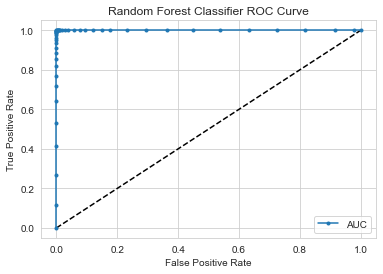

In [29]:
rf = RandomForestClassifier()
rf.fit(X_res, y_res)
y_predicted = rf.predict(X_res)
y_pred_probs = rf.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = rf.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)

#score['Logistic Regression'] = [test_auc, test_acc]

# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [30]:
param_grid = {'n_estimators':[75, 100, 250, 500, 750, 1000], 'criterion':('gini', 'entropy', 'log_loss'), 
          'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 15, 25, 30], 'min_samples_split':[2, 4, 6, 8, 10]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid, cv = 10, scoring = 'f1', return_train_score = True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validati

Best parameters:  {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 1000}
Best score: 0.9676798006816958


### Support Vector Machine

**************************************************
AUC: 0.711
**************************************************
Accuracy: 0.500
**************************************************
F1 Score: 0.667
**************************************************
Recall Score: 1.000
**************************************************
Precision Score: 0.500


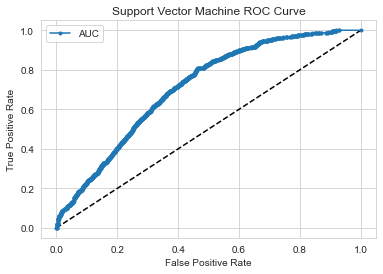

In [31]:
svm = SGDClassifier()
svm.fit(X_res, y_res)
y_predicted = svm.predict(X_res)
y_pred_probs = svm.decision_function(X_res)

# Metrics Evaluation
Acc = svm.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [32]:
param_grid = {'alpha': [10**i for i in range(-4, 5)]}
svm = SGDClassifier()
clf = GridSearchCV(svm, param_grid, cv = 10, scoring='f1', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'alpha': 0.01}
Best score: 0.6657954364747405


### XGBoost Classifier 

**************************************************
AUC: 1.000
**************************************************
Accuracy: 1.000
**************************************************
F1 Score: 1.000
**************************************************
Recall Score: 1.000
**************************************************
Precision Score: 1.000


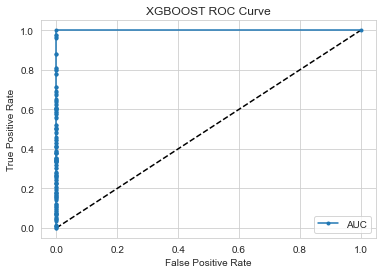

In [33]:
xgb = XGBClassifier()
xgb.fit(X_res, y_res)
y_predicted = xgb.predict(X_res)
y_pred_probs = xgb.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = xgb.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBOOST ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [34]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 15, 20, 25, 30], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500]}
xgb = XGBClassifier() 
clf = GridSearchCV(xgb, param_grid, cv = 10, scoring = 'f1', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'max_depth': 8, 'n_estimators': 100}
Best score: 0.9547002216512357


### Decision Tree Classifier

**************************************************
AUC: 1.000
**************************************************
Accuracy: 1.000
**************************************************
F1 Score: 1.000
**************************************************
Recall Score: 1.000
**************************************************
Precision Score: 1.000


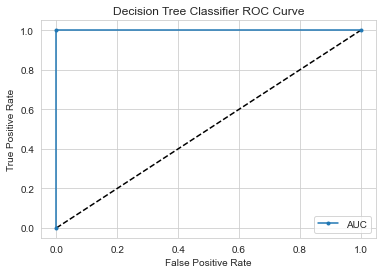

In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)
y_predicted = dtc.predict(X_res)
y_pred_probs = dtc.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = dtc.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier ROC Curve")
plt.show()

### Hyper-parameter Tuning

In [36]:
param_grid = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, param_grid, cv = 10, scoring='f1', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.05}
Best score: 0.7257768537215026


### Neural Network

**************************************************
AUC: 0.844
**************************************************
Accuracy: 0.757
**************************************************
F1 Score: 0.748
**************************************************
Recall Score: 0.722
**************************************************
Precision Score: 0.776


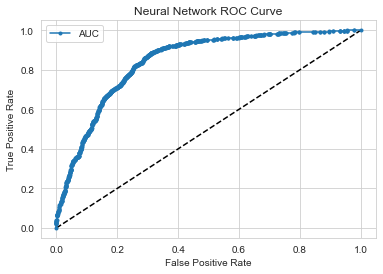

In [37]:
mlp = MLPClassifier()
mlp.fit(X_res, y_res)
y_predicted = mlp.predict(X_res)
y_pred_probs = mlp.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = mlp.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Neural Network ROC Curve")
plt.show()


### Hyper-parameter Tuning

In [38]:
param_grid = {'hidden_layer_sizes': [(1), (2), (3), (4), (5), (6) , (7), (8)], 
'max_iter':[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
mlp = MLPClassifier()
clf = GridSearchCV(mlp, param_grid, cv = 10, scoring='roc_auc', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_iter must be > 0, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged y

Best parameters:  {'hidden_layer_sizes': 8, 'max_iter': 70}
Best score: 0.6931904015124533


C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


### Naive Bayes

**************************************************
AUC: 0.775
**************************************************
Accuracy: 0.558
**************************************************
F1 Score: 0.680
**************************************************
Recall Score: 0.940
**************************************************
Precision Score: 0.533


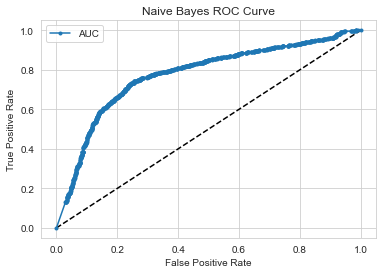

In [39]:
gnb = GaussianNB()
gnb.fit(X_res, y_res)
y_predicted = gnb.predict(X_res)
y_pred_probs = gnb.predict_proba(X_res)

# keep probabilities for the positive outcome only
y_pred_probs = y_pred_probs[:, 1]

# Metrics Evaluation
Acc = gnb.score(X_res, y_res)
Auc = roc_auc_score(y_res, y_pred_probs)
F1_score = metrics.f1_score(y_res, y_predicted)
Recall_score = recall_score(y_res, y_predicted)
Precision_score = precision_score(y_res, y_predicted)


print('*'*50)
print('AUC: %.3f' % Auc)
print('*'*50)
print('Accuracy: %.3f' % Acc)
print('*'*50)
print('F1 Score: %.3f' % F1_score)
print('*'*50)
print('Recall Score: %.3f' % Recall_score)
print('*'*50)
print('Precision Score: %.3f' % Precision_score)


# Plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_res, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label = 'AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.show()

### Hyper-parameter Tuning 

In [40]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GaussianNB()
clf = GridSearchCV(gnb, param_grid, verbose = 1, cv = 10, scoring = 'f1', return_train_score=True)
clf.fit(X_res, y_res)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:  {'var_smoothing': 1e-09}
Best score: 0.6657739483882368


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.6s finished
